<center><h1>ML01: Projet Titanic</h1></center>

## Introduction

Le naufrage du RMS Titanic demeure l'une des catastrophes les plus tragiques de l'histoire. Le 15 avril 1912, lors de son voyage inaugural, le Titanic a sombré après avoir heurté un iceberg, entraînant la perte de 1502 vies parmi les 2224 passagers et membres d'équipage à bord. Cette tragédie a profondément choqué le monde entier et a conduit à des améliorations significatives des normes de sécurité maritime.

L'une des raisons principales pour lesquelles le nombre de victimes a été si élevé réside dans le manque de canots de sauvetage disponibles pour les passagers et l'équipage. Bien que la survie lors du naufrage ait été en partie due à la chance, certaines catégories de personnes ont eu une probabilité plus élevée de survie, notamment les femmes, les enfants et les passagers de la classe supérieure.

Notre objectif est de développer un modèle prédictif pour identifier les passagers ayant survécu à cette tragédie, en se basant sur divers facteurs et caractéristiques des individus.

<!-- Colocar uma imgaem de um link do titanico centralizada -->

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" height="500" />
</center>



| Variable  | Description                                    |
|-----------|------------------------------------------------|
| survival  | Survival (0 = No; 1 = Yes)                       |
| pclass    | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)      |
| name      | Name                                             |
| sex       | Sex                                              |
| age       | Age                                              |
| sibsp     | Number of Siblings/Spouses Aboard                |
| parch     | Number of Parents/Children Aboard                |
| ticket    | Ticket Number                                    |
| fare      | Passenger Fare                                   |
| cabin     | Cabin                                            |
| embarked  | Port of Embarkation   (C = Cherbourg; Q = Queenstown; S = Southampton)|


**NOTE EXPLICATIVE**

Pclass est une approximation du statut socio-économique (SSE).
 1er ~ supérieur ; 2ème ~ moyen ; 3ème ~ inférieur

L'âge est en années et est fractionnaire si l'âge est inférieur à un.
Si l'âge est estimé, il se présente sous la forme xx.5.

En ce qui concerne les variables de relations familiales (c.-à-d. sibsp et parch):certaines relations ont été ignorées.Par exemple, les membres de la famille exclus de cette étude sont les cousins,
neveux/nièces, tantes/oncles et beaux-parents.  Certains enfants ont voyagé uniquement avec une nounou, donc parch=0 pour eux.  De même, certains
ont voyagé avec des amis très proches ou des voisins dans un village, mais les définitions ne permettent pas d'établir de telles relation.
Donc les définitions utilisées pour sibsp et parch sont les suivantes:

* Frère ou sœur :  Frère, sœur, demi-frère ou demi-sœur d'un passager à bord du Titanic.
* Conjoint :   Mari ou femme du passager à bord du Titanic (les maîtresses et les fiancés sont ignorés).

* Parent :   Mère ou père du passager à bord du Titanic.

* Enfant : fils, fille, beau-fils ou belle-fille du passager à bord du Titanic.





## Imports des Librairies

In [7]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

# Ignorer warnings
warnings.filterwarnings("ignore")

## Visualisation des données

In [8]:
df_data = pd.read_csv('train_titanic.csv')
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types des données par colonnes**


In [9]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Le type "object" est une chaîne de caractères pour pandas, ce qui pose des problèmes avec les algorithmes du machine learning.  Si nous voulons les utiliser comme caractéristiques, nous devrons les convertir en représentations numériques.

**Informations élémentaires**

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistiques descriptives**

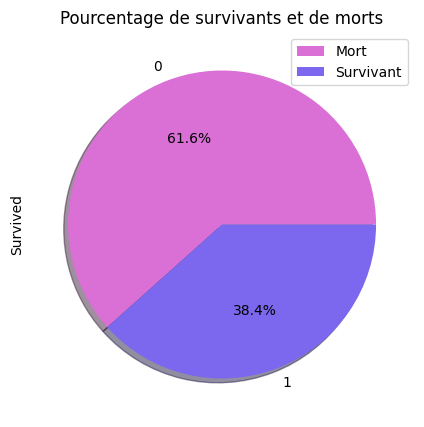

In [11]:
df_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,5),colors=['orchid','mediumslateblue'])
plt.title('Pourcentage de survivants et de morts')
plt.legend(['Mort','Survivant'])
plt.show()

Le graphique ci-dessus nous indique que d'après notre base de données, il y a 61,6% de passagers du Titanic qui sont morts contre 38,4% qui sont vivants. Il est interressant de se rendre compte qu'il y a plus de personnes qui sont mortes que de personnes vivantes.

In [12]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Les informations fournies ci dessus sont un résumé statistique des données contenues dans notre base d'apprentissage.

* "count" indique le nombre d'observations pour chaque variable.

* "mean" représente la moyenne des valeurs pour chaque variable.

* "std" est l'écart type, une mesure de la dispersion des données autour de la moyenne.

* "min" et "max" correspondent aux valeurs minimales et maximales observées dans chaque variable.

* Les quartiles (25%, 50%, 75%) indiquent les valeurs qui séparent les données en quatre parties égales. Par exemple, le 25e percentile de l'âge est de 20,1 ans, ce qui signifie que 25 % des passagers ont un âge inférieur ou égal à 20,1 ans.


Ci après nous visualiserons nos données à l'aide de représentation graphique

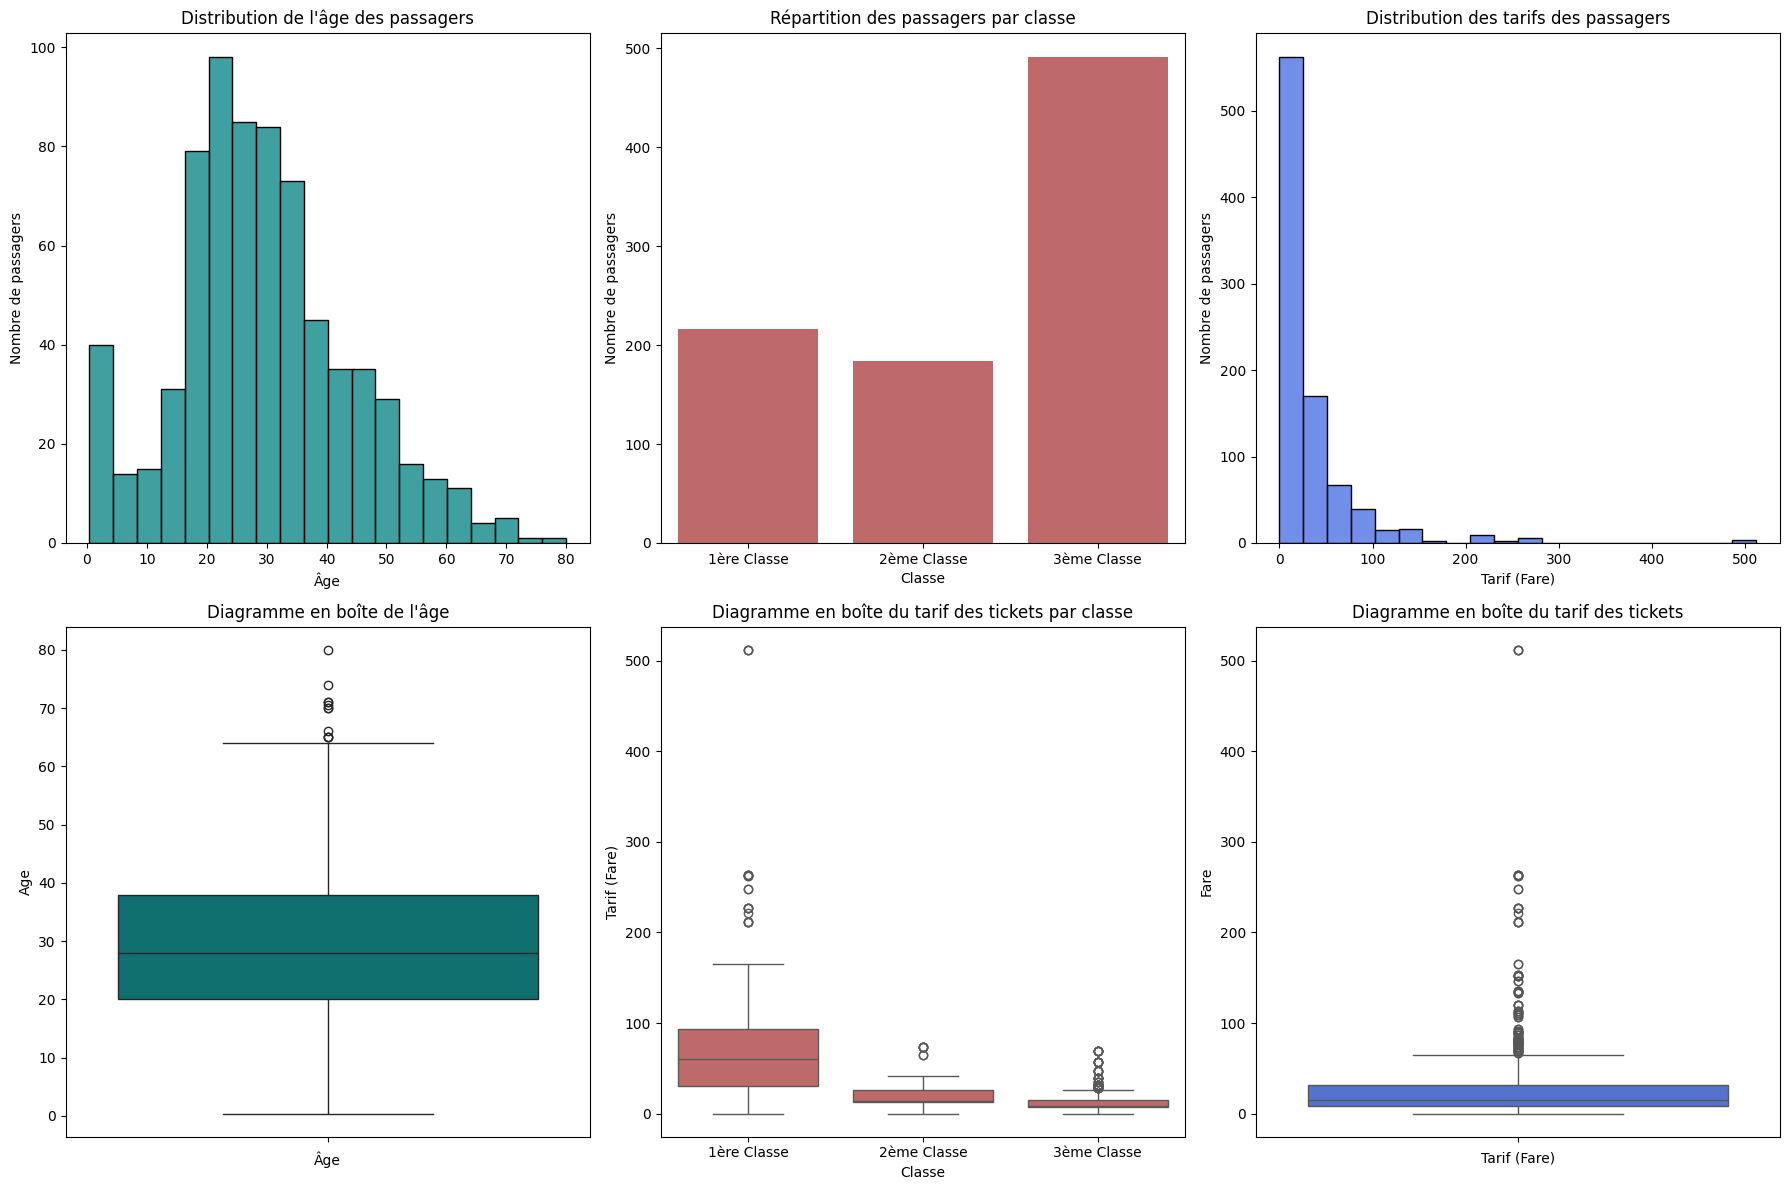

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rangée supérieure de graphiques
# Graphique de l'âge
sns.histplot(data=df_data, x='Age', bins=20, color='#008080', ax=axes[0, 0])
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Nombre de passagers')
axes[0, 0].set_title('Distribution de l\'âge des passagers')

# Graphique de la classe des passagers (Pclass)
class_counts = df_data['Pclass'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, color='#CD5C5C', ax=axes[0, 1])
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].set_title('Répartition des passagers par classe')
axes[0, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Graphique de fare
sns.histplot(data=df_data, x='Fare', bins=20, color='#4169E1', ax=axes[0, 2])
axes[0, 2].set_xlabel('Tarif (Fare)')
axes[0, 2].set_ylabel('Nombre de passagers')
axes[0, 2].set_title('Distribution des tarifs des passagers')

# Rangée inférieure de graphiques
# Diagramme en boîte de l'âge
sns.boxplot(data=df_data, y='Age', color='#008080', ax=axes[1, 0])
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_title('Diagramme en boîte de l\'âge')

sns.boxplot(data=df_data, x='Pclass', y='Fare', color='#CD5C5C', ax=axes[1, 1])
axes[1, 1].set_xlabel('Classe')
axes[1, 1].set_ylabel('Tarif (Fare)')
axes[1, 1].set_title('Diagramme en boîte du tarif des tickets par classe')
axes[1, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Diagramme en boîte de Fare
sns.boxplot(data=df_data, y='Fare', color='#4169E1', ax=axes[1, 2])
axes[1, 2].set_xlabel('Tarif (Fare)')
axes[1, 2].set_title('Diagramme en boîte du tarif des tickets')

plt.tight_layout()
plt.show()


**Corrélation entre les variables**

Comprendre la matrice de corrélation des variables est essentiel pour analyser les relations entre les différentes caractéristiques d'un ensemble de données. Dans le graphique ci-dessus, une matrice de corrélation a été créée pour le dataframe "df_train." Cette matrice de corrélation permet de visualiser la force et la direction des relations linéaires entre les variables.

Les points clés à retenir à partir de la matrice de corrélation sont les suivants :

* **Valeurs de Corrélation** : Les valeurs se situent dans la plage de -1 à 1. Une valeur de 1 indique une corrélation positive parfaite, ce qui signifie que lorsque la variable A augmente, la variable B augmente également. Une valeur de -1 indique une corrélation négative parfaite, ce qui signifie que lorsque la variable A augmente, la variable B diminue. Une valeur proche de 0 suggère une faible corrélation.

* **Coloration** : Les couleurs dans la matrice de corrélation indiquent le degré de corrélation. Les tons plus clairs représentent une corrélation positive, tandis que les tons plus foncés représentent une corrélation négative.

*  **Annotations** : Les chiffres dans chaque cellule de la matrice indiquent la valeur de corrélation entre les variables correspondantes. Une annotation proche de 1 ou -1 indique une forte corrélation, tandis qu'une annotation proche de 0 indique une faible corrélation.

*  **Analyse des Relations** : En utilisant cette matrice, il est possible d'identifier quelles paires de variables sont fortement corrélées. Si deux variables ont une corrélation positive proche de 1, cela suggère qu'elles augmentent ensemble, tandis qu'une corrélation négative proche de -1 indique qu'elles évoluent en sens opposé. Par exemple, les variables "Sibp" et "Parch" sont les plus corrélées ainsi que les variables "Fare" et "Pclass".



<Axes: >

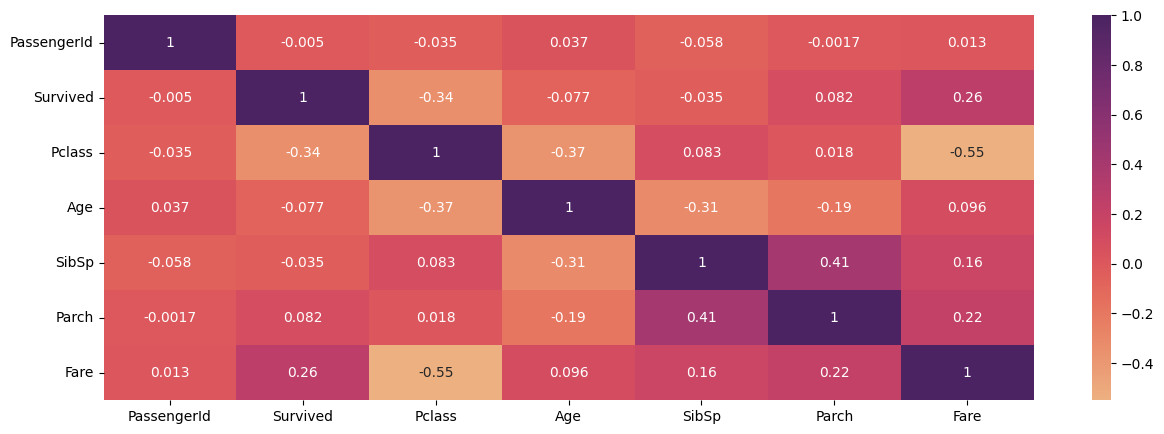

In [14]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("flare", as_cmap=True)  # Substitua "coolwarm" pela paleta de cores desejada
sns.heatmap(df_data.corr(), annot=True, cmap=custom_palette)

<!-- Petit text pour parler sur les correlations entre noitre variable depedent (Survived et les autres) -->

À travers la carte de corrélation de notre base de données, nous pouvons identifier les variables ayant le plus grand impact et présentant une corrélation avec notre variable de classe(Survived). Notamment, nous constatons que la variable de classe ne montre pas de corrélation significative avec les autres variables indépendantes de notre base de données. Il est à noter que la corrélation la plus élevée identifiée concerne la variable Fare, avec un coefficient de 0,26

Nous souhaitons à présent visualiser la distribution des tarifs des passagers en fonction de la survie. En effet, d'après notre matrice de corrélation, nous avons identifié la variable "Fare" comme celle qui influence le plus la classe à laquelle appartient une observation. Il est donc pertinent de voir le nombres de survivants et de morts par rapport au tarif des tickets.
L'histogramme réaliser ci-dessous nous permet de bien visualiser cette distribution.

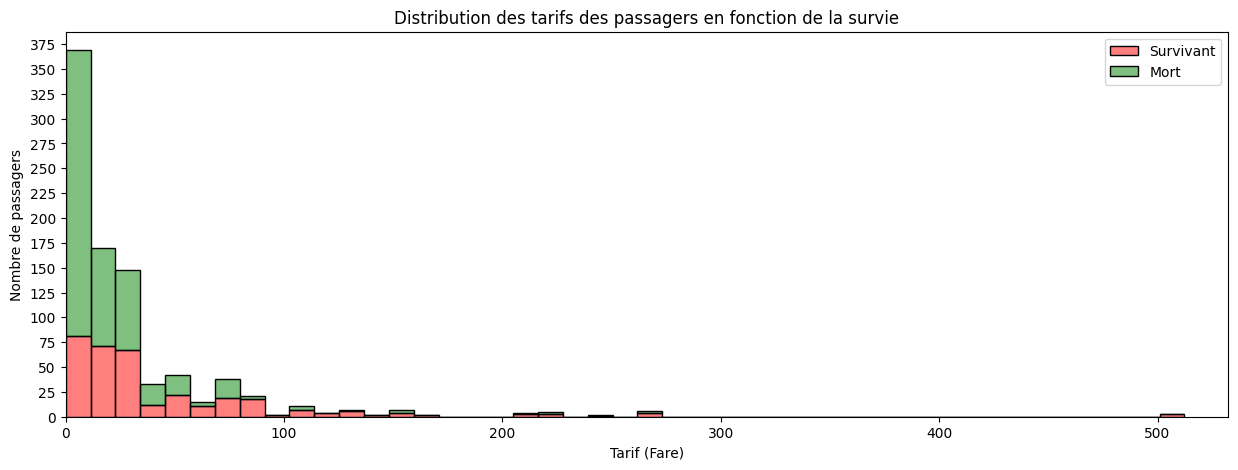

In [15]:
# graphique histogramme qui permet de visualiser la distribution des survivants et morts par rapport aux tarifs des tickets.
plt.figure(figsize=(15, 5))
plt.xlim(0, df_data['Fare'].max() + 20)
plt.yticks(np.arange(0, 500, 25))

sns.histplot(data=df_data, x='Fare', hue='Survived', bins=45, palette=['green','red'],alpha=0.5,multiple='stack')
plt.title('Distribution des tarifs des passagers en fonction de la survie')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Nombre de passagers')
plt.legend(['Survivant','Mort'])
plt.show()


Maintenant que nous avons une idée générale du contenu de l'ensemble de données, nous pouvons approfondir l'aperçu de chaque colonne.  Nous allons effectuer une analyse exploratoire des données et les "nettoyer" afin de définir les caractéristiques que nous utiliserons dans nos algorithmes de machine learning.


## Prétraitement des données

**Suppression des Colonnes "Name", "PassengerID", "Ticket"**

La suppression des colonnes 'Name', 'PassengerID'et 'Ticket' est justifiée par leur nature redondante et leur manque de pertinence pour notre analyse. Les noms des passagers, les identifiants uniques et les numéros de billets ne contiennent pas d'informations utiles pour notre étude car ce sont pour la plupart de simples identifiants. En les éliminant, nous simplifions notre jeu de données et pouvons nous concentrer sur les caractéristiques clés ayant un impact sur nos résultats.

In [16]:
df_data = df_data.drop (['Name','PassengerId','Ticket'], axis = 1)

**Gestion des Valeurs Manquantes dans notre Ensemble de Données**

Il apparaît que dans notre ensemble de données, les colonnes "Age", "Cabin" et "Embarked" contiennent des valeurs manquantes. En particulier, la colonne "Cabine" affiche un nombre significatif de valeurs manquantes, soit 687 au total, ce qui la rend difficile à utiliser de manière significative. Par conséquent, nous envisageons de supprimer complètement cette colonne de notre analyse.

Pour les colonnes "Age" et "Embarked", nous avons une approche différente. Les valeurs manquantes dans la colonne "Age" peuvent être estimées en utilisant des méthodes telles que la  la médiane. Cela nous permettra de remplir ces valeurs manquantes avec des estimations raisonnables de l'âge des passagers.

Quant à la colonne "Embarked" (port d'embarquement), nous pouvons remplir les valeurs manquantes en utilisant la valeur la plus courante (le port le plus fréquent) .

En résumé, nous prévoyons de supprimer la colonne "Cabin" en raison du grand nombre de valeurs manquantes, et pour les colonnes "Age" et "Embarked", nous utiliserons des techniques d'imputation pour remplir les valeurs manquantes de manière à ce que notre analyse puisse se poursuivre de manière significative.

In [17]:
# Vérifiez si la colonne Cabin existe, et si c'est le cas, nous la supprimons
if 'Cabin' in df_data.columns:
    df_data = df_data.drop (['Cabin'], axis = 1)

# Remplacement des valeurs manquantes dans la colonne Age par la médiane
median_age = df_data['Age'].median()
df_data['Age'].fillna(median_age, inplace=True)

# Remplacement des valeurs manquantes dans la colonne Embarked par la valeur la plus fréquente
most_frequent_embarked = df_data['Embarked'].value_counts().index[0]
df_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB



**Transformation des Variables Qualitatives en Quantitatives :**

Dans le cadre de notre analyse de données, il est crucial de convertir les variables qualitatives en variables quantitatives. Les variables qualitatives, telles que le sexe et le port d'embarquement, sont des informations importantes, mais la plupart des algorithmes d'apprentissage automatique exigent que les données d'entrée soient numériques.

Pour que nos modèles puissent traiter ces informations, nous utilisons une approche de transformation. Plutôt que d'utiliser le LabelEncoder, qui attribue des identifiants numériques uniques à chaque catégorie des variables qualitatives, nous optons pour le One-Hot Encoding. Le One-Hot Encoding crée des colonnes binaires distinctes pour chaque catégorie, attribuant ainsi 0 ou 1 en fonction de la présence de la catégorie dans une observation. Par exemple, la variable 'Sex' avec les catégories 'Male' et 'Female' serait transformée en deux nouvelles colonnes 'Sex_Male' et 'Sex_Female'. Cette approche permet aux algorithmes de comprendre et d'utiliser ces données qualitatives de manière significative, sans introduire d'ordre artificiel entre les catégories.

In [18]:
df_data = pd.get_dummies(df_data, columns=["Sex", "Embarked"], prefix=["Sex", "Embarked"])

In [19]:
df_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Mise à l'échelle**

Elle est nécessaire pour garantir que les différentes variables caractéristiques de notre jeuu de données ont des échelles comparables. Sans mise à l'échelle, les caractéristiques qui ont des échelles très différentes peuvent biaiser négativement nos algorithmes d'apprentissage automatique, en particulier ceux qui se basent sur des mesures de distance ou qui effectuent des calculs numériques.

Lorsque des caractéristiques ont des échelles différentes, cela signifie que certaines d'entre elles peuvent avoir une influence disproportionnée sur les résultats de l'algorithme par rapport à d'autres caractéristiques. La mise à l'échelle permet de ramener toutes les caractéristiques à une même échelle, généralement avec une moyenne de 0 et un écart type de 1. Cela garantit que chaque caractéristique contribue de manière équilibrée aux calculs, améliorant ainsi la performance et l'interprétabilité des modèles d'apprentissage automatique.



In [20]:
std = StandardScaler()

columns = ['Age', 'Fare']
scaled = std.fit_transform(df_data[columns])

# Création d'un nouveau DataFrame avec les données mises à l'échelle
scaled = pd.DataFrame(scaled, columns=columns)

# Suppression des colonnes 'Age' et 'Fare'
df = df_data.drop(columns=columns, axis=1)

# Fusion des données mises à l'échelle avec le DataFrame d'origine
df = df.merge(scaled, left_index=True, right_index=True, how="left")

df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,1,0,0,0.663861,0.786845
2,1,3,0,0,1,0,0,0,1,-0.258337,-0.488854
3,1,1,1,0,1,0,0,0,1,0.433312,0.420730
4,0,3,0,0,0,1,0,0,1,0.433312,-0.486337


**Division de la base de données en base d'apprentissage et de test**

Nous divisons l'ensemble de données en deux ensembles distincts : l'ensemble d'entraînement et l'ensemble de test. L'ensemble d'entraînement est utilisé pour former le modèle, tandis que l'ensemble de test est réservé pour évaluer sa performance. Cette séparation est essentielle pour simuler la manière dont le modèle se comportera sur de nouvelles données inconnues. En effet, l'objectif est de s'assurer que le modèle peut généraliser ses connaissances au-delà des données sur lesquelles il a été formé.

Avec la séparation des données en ensembles d'entraînement et de test, nous appliquons des techniques de validation croisée pendant la modélisation. En fin de compte, nous utilisons l'ensemble de test pour l'évaluation. Cette procédure aide à prévenir le surajustement aux données de test, offrant ainsi une évaluation plus réaliste des performances du modèle sur de nouvelles données

Les lignes de code ci-dessous  réalisent plusieurs étapes cruciales dans la préparation des données pour un modèle de classification. Tout d'abord, la variable cible 'Survived' est isolée et stockée dans un nouveau DataFrame appelé 'YRdf'. Ensuite, cette variable cible est convertie en un tableau numpy unidimensionnel, où chaque élément est augmenté de 1 pour ainsi avoir comme classe associée 1 ou 2, à la place de 0 et 1. Quant aux variables descriptives X, elles sont conservées mais on a bien supprimé la colonne 2survived"qui représentait les classes des observations.

L'ensemble de données est divisé en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) à l'aide de la fonction `train_test_split`, avec 30% des données réservées pour les tests et une graine aléatoire assurant la reproductibilité.

 Le nombre de classes (K) est déterminé en trouvant la valeur maximale dans les labels (ici K sera donc égale à 2 puisqu'on a dorénavant soit la classe 1 soit la classe 2).
  Enfin, la matrice L de coût ou de pertes est créée: les éléments diagonaux sont nuls et les autres sont établis à 1.

In [21]:
# Selecione apenas a coluna 'Survived' como array NumPy
y = df['Survived'].values

# Adicione 1 a cada elemento em y
YR = y + 1

# Use diretamente df.drop e converta para array
X = df.drop(['Survived'], axis=1).values

# Use train_test_split diretamente para obter os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train += 1

K = int(np.max(YR))

# Fonction de perte L0-1
L = np.ones((K, K)) - np.eye(K)


[Text(0.5, 1.0, 'T-SNE projection')]

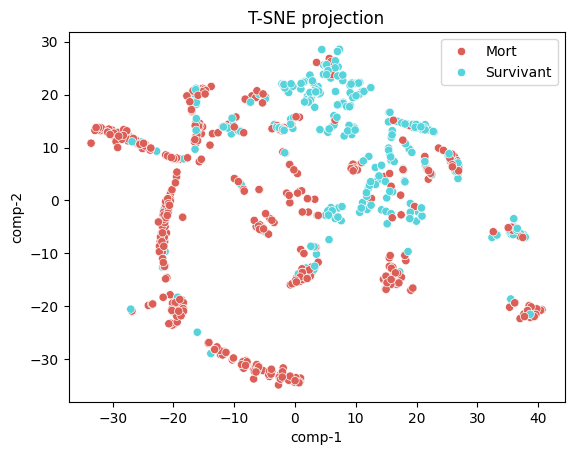

In [22]:

# Projecttion de tous les points dans un espace de dimension 2
tsne = TSNE(n_components=2, verbose=0, random_state=123)
z = tsne.fit_transform(X)

df = pd.DataFrame()
df['y'] = YR
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

Dans le cadre de notre projet d'analyse de données, nous disposons d'un fichier dédié, nommé functions.ipynb, qui renferme un ensemble de fonctions spécialement conçues pour l'analyse des données. Ces fonctions ont été développées de manière à faciliter et à optimiser les différentes étapes de notre processus d'analyse.

In [404]:
run functions.ipynb

## K-Nearest-Neighbours (KNN)

Nous allons maintenant utiliser le classificateur KNN (K-Nearest Neighbors), une technique d'apprentissage supervisé. Le KNN est un algorithme qui classe un point de données en fonction de la majorité des classes de ses voisins les plus proches. En résumé, il prend en compte la proximité entre les données pour effectuer des prédictions. Dans notre approche, nous intégrerons la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données.

In [405]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_kn = np.array([1, 10, 20, 30, 40, 50, 100])
nb_kn = stock_kn.shape[0]
stock_average_risk_Train = np.zeros((nbFolds, nb_kn))
stock_average_risk_Val = np.zeros((nbFolds, nb_kn))

min_diff_kn = None
min_diff = float('inf')

for f, (train, val) in enumerate(kfSplit):
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    for t, kn in enumerate(stock_kn):
        model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
        model_KNN.fit(XTrain, YRTrain.ravel())

        YhatTrainKNN = model_KNN.predict(XTrain)
        stock_average_risk_Train[f, t] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)

        YhatValKNN = model_KNN.predict(XVal)
        stock_average_risk_Val[f, t] = compute_average_risk(YRVal, YhatValKNN, K, L)

        # Track the minimum difference between training and validation curves
        diff = abs(np.mean(stock_average_risk_Train, 0)[t] - np.mean(stock_average_risk_Val, 0)[t])
        if diff < min_diff:
            min_diff = diff
            min_diff_kn = kn

### Analyse des résultats KNN

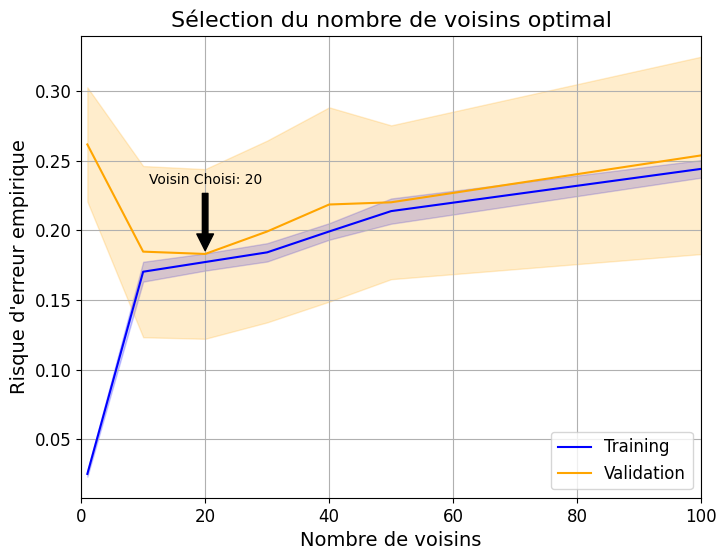

In [406]:
# Afficher les courbes d'erreur moyenne
plt.figure(figsize=(8, 6))
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Train, 0), label='Training', color='blue')
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Val, 0), label='Validation', color='orange')

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Train, 0) - np.std(stock_average_risk_Train, 0),
                 np.mean(stock_average_risk_Train, 0) + np.std(stock_average_risk_Train, 0),
                 color='blue', alpha=0.2)

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Val, 0) - np.std(stock_average_risk_Val, 0),
                 np.mean(stock_average_risk_Val, 0) + np.std(stock_average_risk_Val, 0),
                 color='orange', alpha=0.2)

# Trouver l'index avec la plus petite différence
min_diff_index = np.argmin(np.abs(np.mean(stock_average_risk_Train, 0) - np.mean(stock_average_risk_Val, 0)))
min_diff_kn = stock_kn[min_diff_index]

# Annoter le point où il y a la différence minimale
plt.annotate(f'Voisin Choisi: {min_diff_kn}',
             xy=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index]),
             xytext=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index] + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')

plt.xlim(0, np.max(stock_kn))

plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Risque d'erreur empirique", fontsize=14)
plt.title("Sélection du nombre de voisins optimal", fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Nous avons utilisé la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données. Nous avons choisi 10 "folds" pour réaliser la validation croisée. De plus, nous avons stocké les accuracy globales et par classes afin de pouvoir les réutiliser ultérieurement et mieux interpréter nos résultats.  Le graphique ci-dessus montre les résultats de la validation croisée pour différentes valeurs de k. Nous constatons que la valeur optimale de k, c'est à dire le nombre de voisins, est de 20.




Les mesures telles que le risque moyen, le risque par classe, l'exactitude moyenne et la matrice de confusion sont calculées et stockées à chaque fois.

Les graphiques générés à la suite présentent les résultats de la validation croisée. Le premier graphique montre le risque moyen sur les ensembles d'entraînement et de validation. Le deuxième graphique présente l'exactitude moyenne sur les deux ensembles. Enfin, la matrice de confusion moyenne est affichée pour les ensembles d'entraînement et de validation.

Ces visualisations offrent un aperçu de la performance du modèle sur différents plis, permettant ainsi d'évaluer sa robustesse et sa capacité à généraliser sur des données non vues.

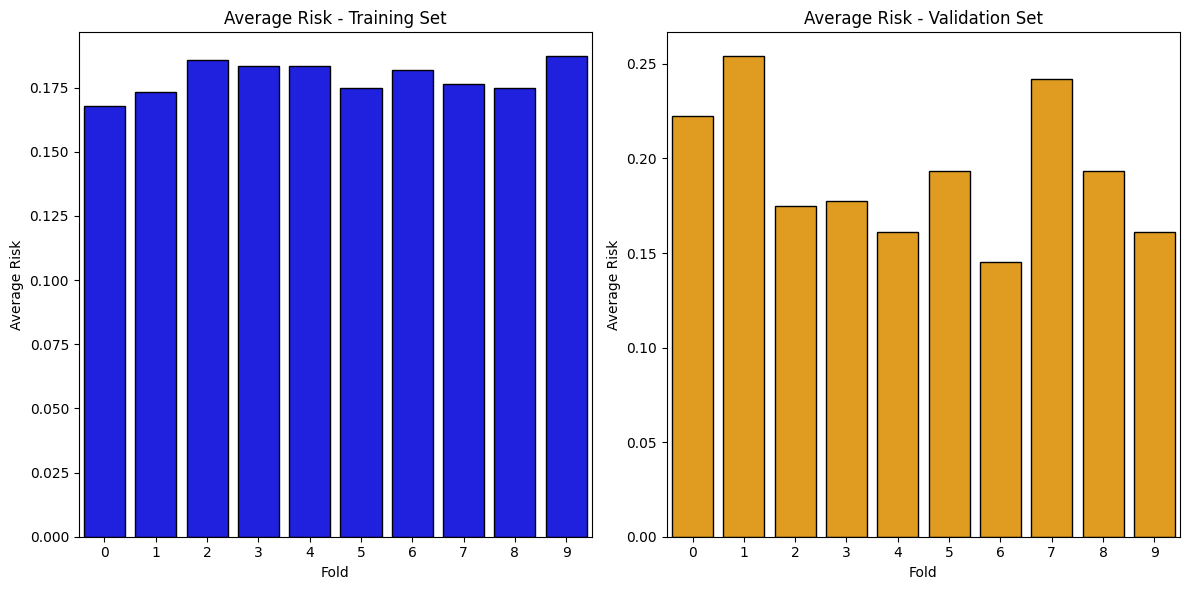

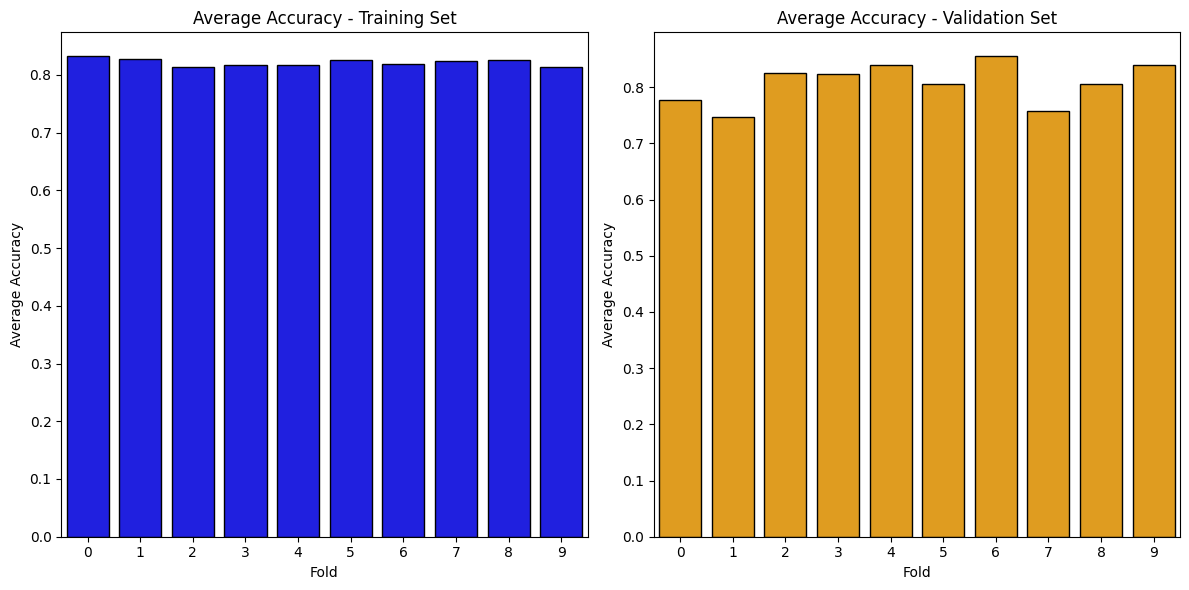

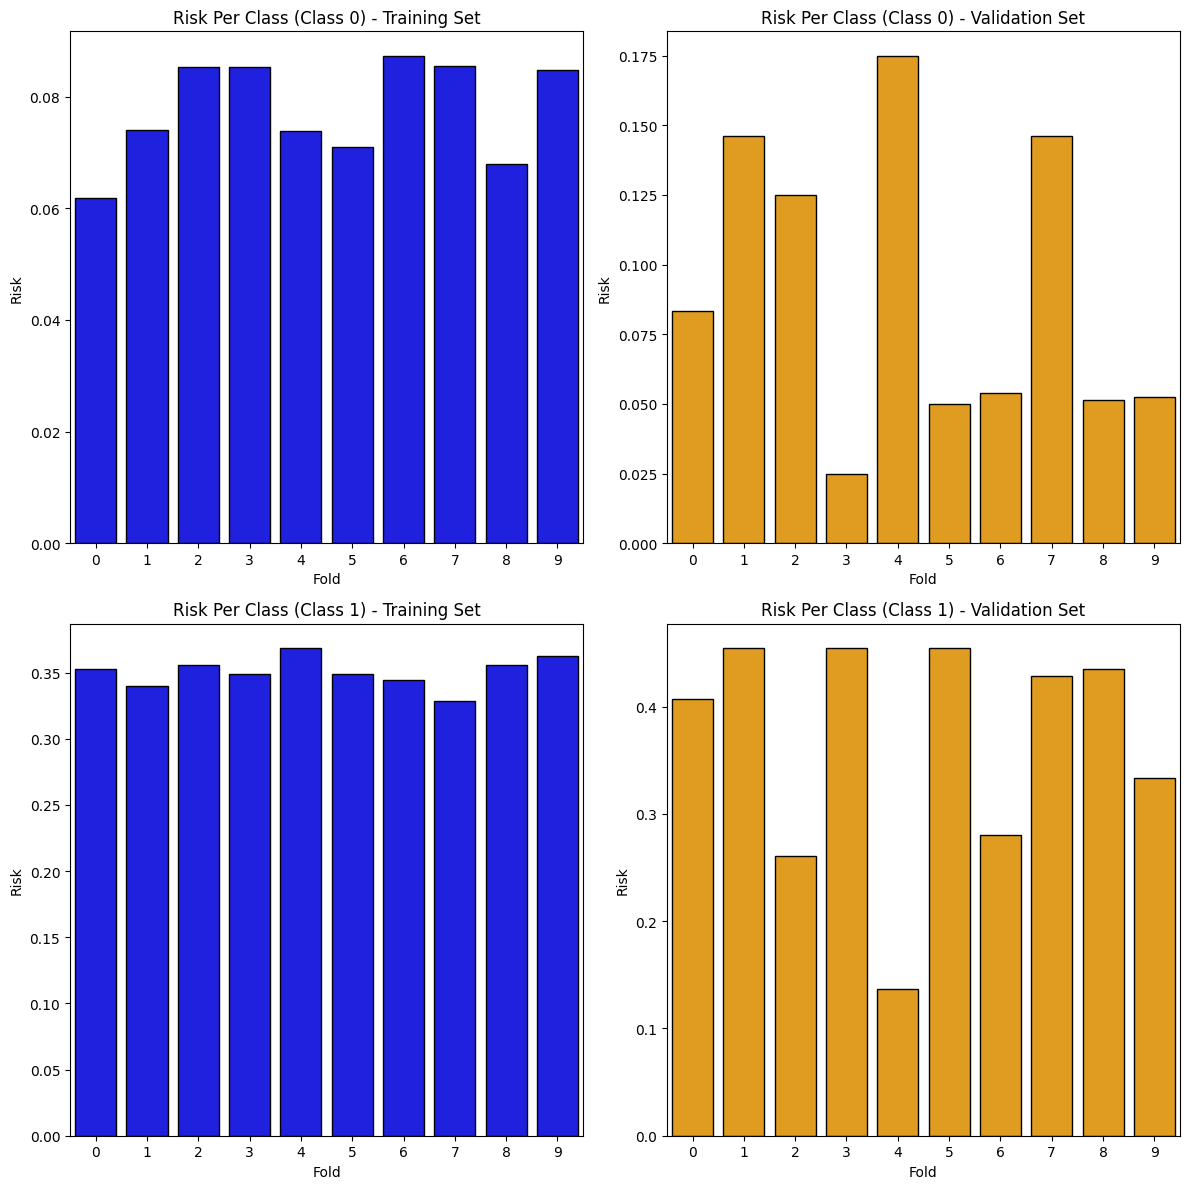

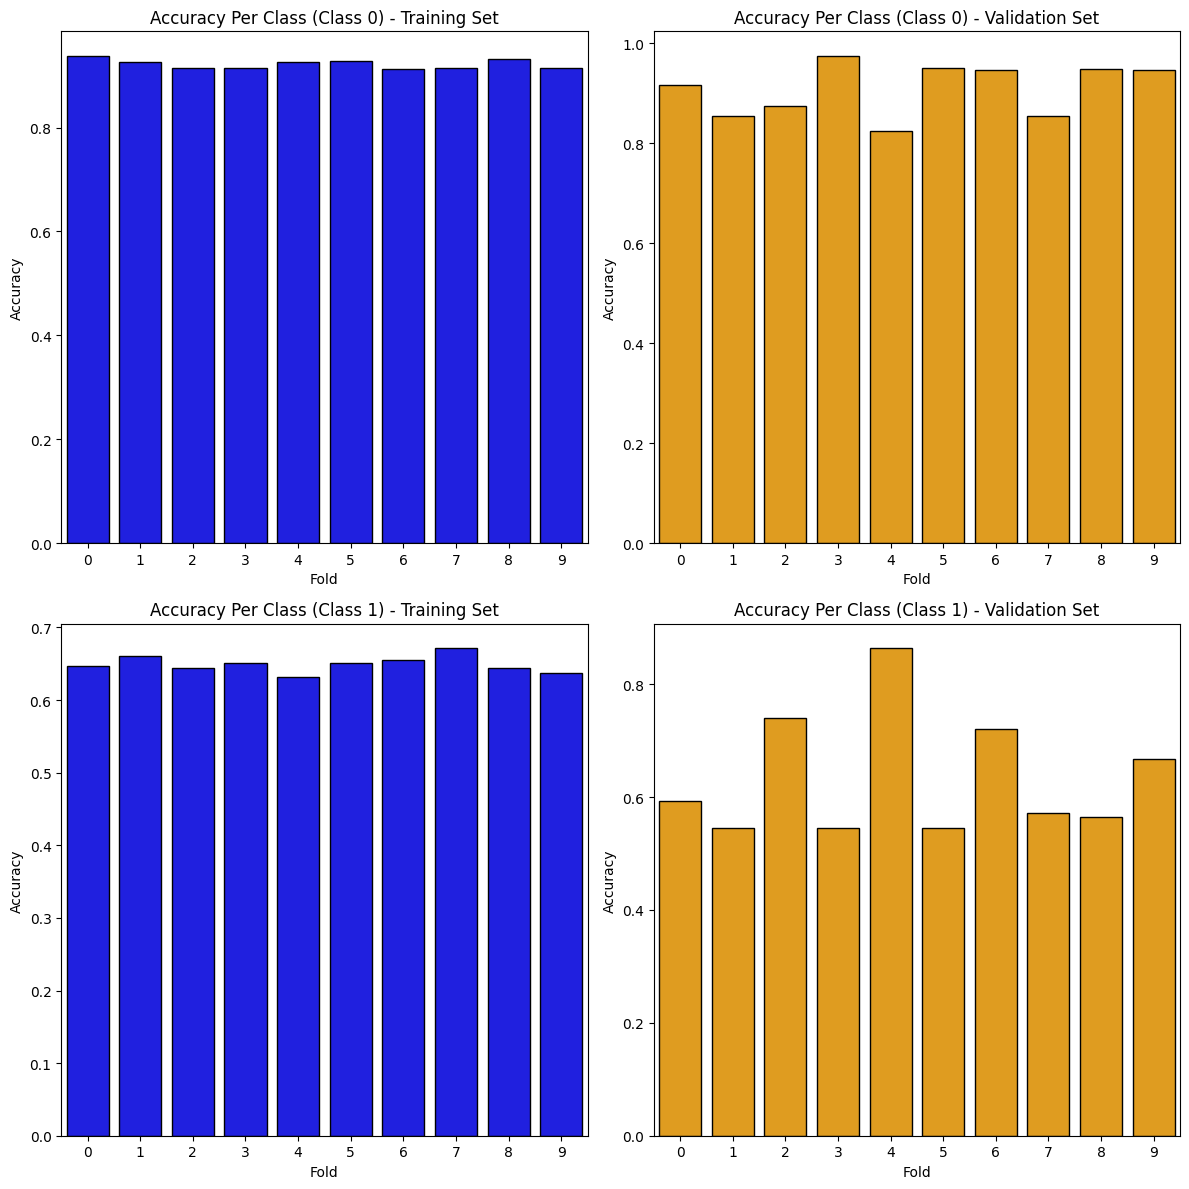

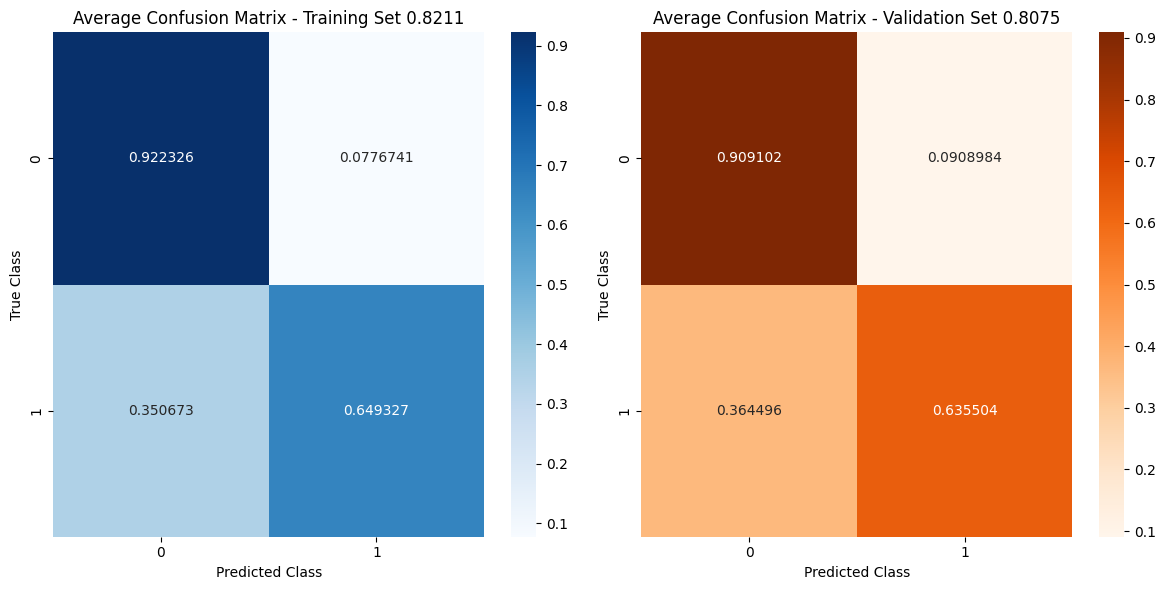

In [407]:
nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train = np.zeros((nbFolds, 1))
stock_average_risk_Val = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train = np.zeros((nbFolds, K))
stock_RiskPerClass_Val = np.zeros((nbFolds, K))

stock_Accuracy_Train = np.zeros(nbFolds)
stock_Accuracy_Val = np.zeros(nbFolds)

stock_AccPerClass_Train = np.zeros((nbFolds, K))
stock_AccPerClass_Val = np.zeros((nbFolds, K))

stock_ConfMat_Train = np.zeros((nbFolds, K, K))
stock_ConfMat_Val = np.zeros((nbFolds, K, K))

best_fold_XTrain = None
best_fold_YRTrain = None
best_fold_YhatTrainKNN = None
max_accuracy = 0.0

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
    model_KNN.fit(XTrain, YRTrain.ravel())

    YhatTrainKNN = model_KNN.predict(XTrain)
    stock_average_risk_Train[f, 0] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)
    stock_RiskPerClass_Train[f, :] = compute_risk_per_class(YRTrain, YhatTrainKNN, K, L)
    stock_Accuracy_Train[f] = compute_accuracy(YRTrain, YhatTrainKNN)
    stock_AccPerClass_Train[f, :] = compute_accuracy_per_class(YRTrain, YhatTrainKNN, K)
    stock_ConfMat_Train[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrainKNN, K)

    
    YhatValKNN = model_KNN.predict(XVal)
    stock_average_risk_Val[f, 0] = compute_average_risk(YRVal, YhatValKNN, K, L)
    stock_RiskPerClass_Val[f, :] = compute_risk_per_class(YRVal, YhatValKNN, K, L)
    stock_Accuracy_Val[f] = compute_accuracy(YRVal, YhatValKNN)
    stock_AccPerClass_Val[f, :] = compute_accuracy_per_class(YRVal, YhatValKNN, K)
    stock_ConfMat_Val[f, :, :] = compute_confusion_matrix(YRVal, YhatValKNN, K)

    

    accuracy_val = compute_accuracy(YRTrain, YhatTrainKNN)
    if accuracy_val > max_accuracy:
        max_accuracy = accuracy_val
        best_fold_XTrain = XTrain
        best_fold_YRTrain = YRTrain
        best_fold_YhatTrainKNN = YhatTrainKNN

    f = f + 1


# Afficher le risque moyen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuarcy moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Aficher risk per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuracy per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Train[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot  Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Train[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot  Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Val[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Val[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


# Afficher la matrice de confusion moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, 0), annot=True, cmap='Blues', fmt='g')
plt.title(f'Average Confusion Matrix - Training Set {np.mean(stock_Accuracy_Train):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, 0), annot=True, cmap='Oranges', fmt='g')
plt.title(f'Average Confusion Matrix - Validation Set {np.mean(stock_Accuracy_Val):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 17,5% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augmente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autre fois. Le risque d'ereur moyen le plus élevé sur la base de test est 28% environ contre à peine 10% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie d'avantage mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de validation fluctue entre environ 70% et plus de 90% environ.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6).
Pour la figure 5, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par les valeurs:  \begin{bmatrix} 0.93 & 0.07 \\ 0.35 & 0.65 \end{bmatrix}
Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 93% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 65% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est celle des "morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 35% des échantillons positifs comme négatifs (False Negatives) et 7% des échantillons négatifs comme positifs (False Positives). Autrement dit 7% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 35% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.92 & 0.08 \\ 0.35 & 0.65 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 92% de précision pour la classe positive et 65% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.07 et 0.35, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

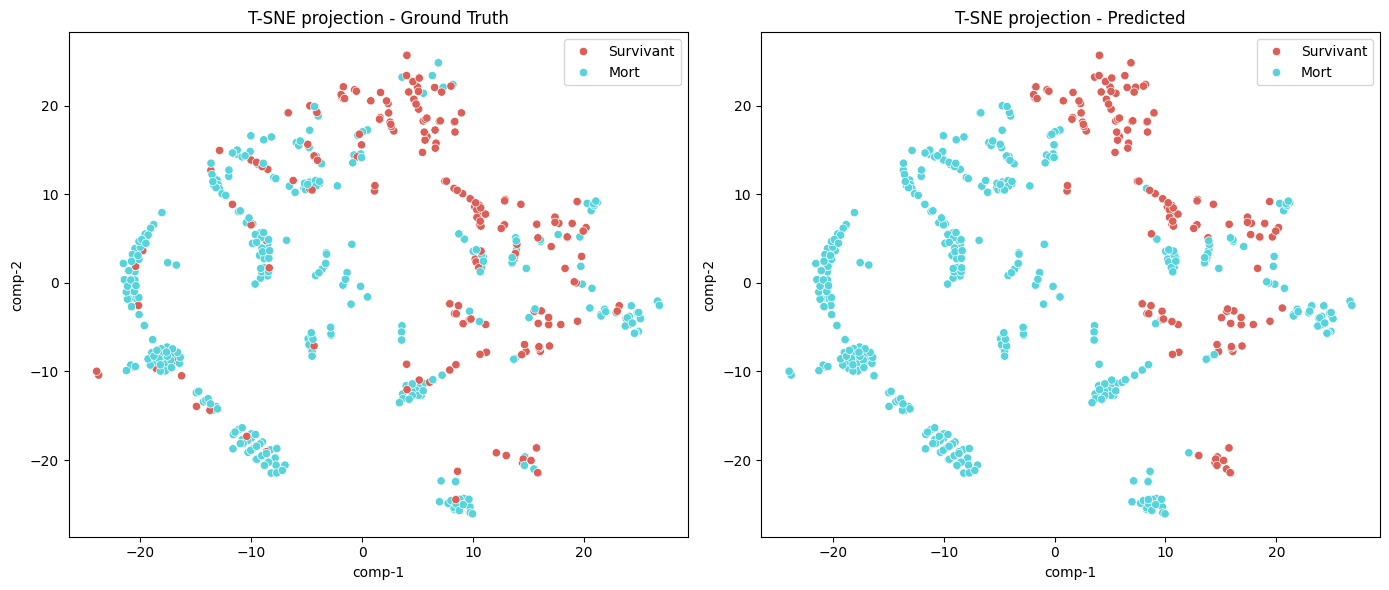

In [408]:
# TSNE projection - Ground Truth vs Predicted

plt.figure(figsize=(14, 6))

# Aficher Ground Truth
plt.subplot(1, 2, 1)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YRTrain
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Ground Truth")

# Afiicher Predicted
plt.subplot(1, 2, 2)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YhatTrainKNN
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Predicted")

plt.tight_layout()
plt.show()

## Classifieur de Bayes Naïf CNB


Le modèle  du classifieur de Bayes Naïf est couramment choisi pour sa rapidité de mise en œuvre et sa capacité à traiter des dimensions élevées, faisant de lui un choix judicieux pour des bases de données comportant de nombreuses fonctionnalités.

Le fonctionnement théorique du classifieur de Bayes naïf repose sur le théorème de Bayes, qui permet d'estimer la probabilité qu'une instance de données appartienne à une classe spécifique. Malgré son aspect "naïf", le modèle assume l'indépendance des caractéristiques, ce qui signifie qu'il considère chaque caractéristique comme étant indépendante des autres. Cette hypothèse simplificatrice, bien que parfois peu réaliste, permet au classifieur de Bayes naïf de fournir des résultats robustes dans de nombreux scénarios.

En pratique, le classifieur évalue la probabilité a priori de chaque classe ainsi que la probabilité conditionnelle de chaque caractéristique étant donné la classe. En combinant ces informations, il calcule la probabilité a posteriori de chaque classe pour une instance de données donnée. La classe avec la probabilité la plus élevée est attribuée à l'instance, permettant ainsi la classification des données de manière rapide et efficace.

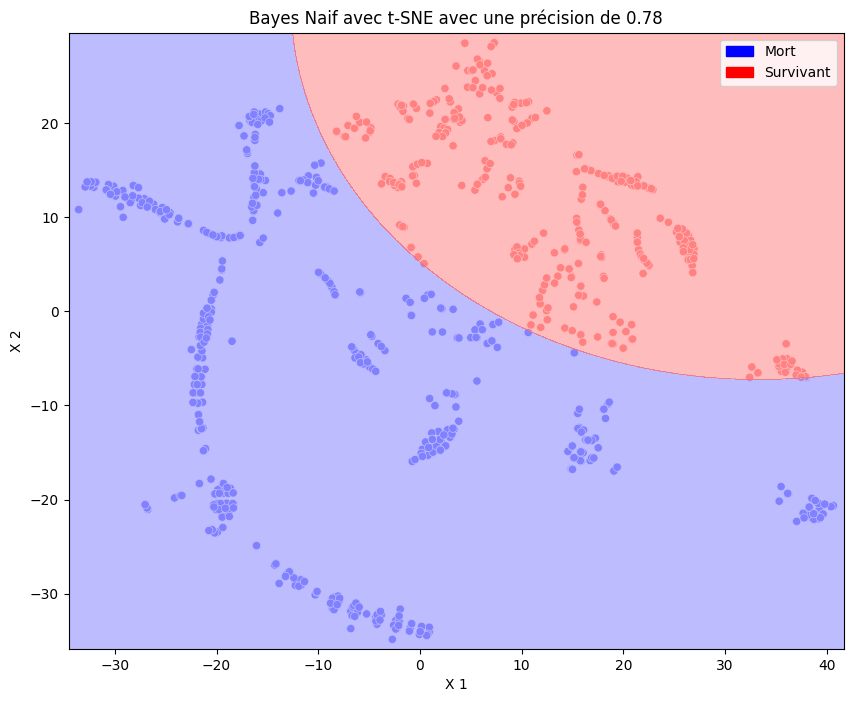

In [299]:
from sklearn.naive_bayes import GaussianNB

# Treinar o modelo Naive Bayes
model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)

# Prever os dados de teste
predictions_bayes = model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, predictions_bayes)
conf_matrix_bayes = confusion_matrix(y_test, predictions_bayes)

# Aplicar o t-SNE para reduzir para 2 dimensões
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Treinar o modelo Naive Bayes nos dados transformados pelo t-SNE
model_bayes.fit(X_tsne, y)
predictions_bayes_tsne = model_bayes.predict(X_tsne)
accuracy_bayes_tsne = accuracy_score(y, predictions_bayes_tsne)
conf_matrix_bayes_tsne = confusion_matrix(y, predictions_bayes_tsne)

# Plotar os pontos de dados
plt.figure(figsize=(10, 8))

# Seu código de plotagem usando sns.scatterplot
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_bayes_tsne, palette='bwr', marker='o', legend=False)

# Plotar a fronteira de decisão
h = .02
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Adicionar legenda
label2 = ['Mort' if label == 0 else 'Survivant' for label in y]
unique_labels = list(set(label2))
legend_labels = ['Mort' if label == unique_labels[0] else 'Survivant' for label in label2]

# Criar mapeamento de cores para a legenda
colors = {'Mort': 'blue', 'Survivant': 'red'}
legend_patches = [mpatches.Patch(color=colors[label], label=label) for label in set(legend_labels)]

# Adicionar legenda usando a biblioteca Legend
legend = Legend(plt.gca(), legend_patches, labels=set(legend_labels), loc='upper right')
plt.gca().add_artist(legend)

plt.title(f'Bayes Naif avec t-SNE avec une précision de {accuracy_bayes_tsne:.2f}')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()


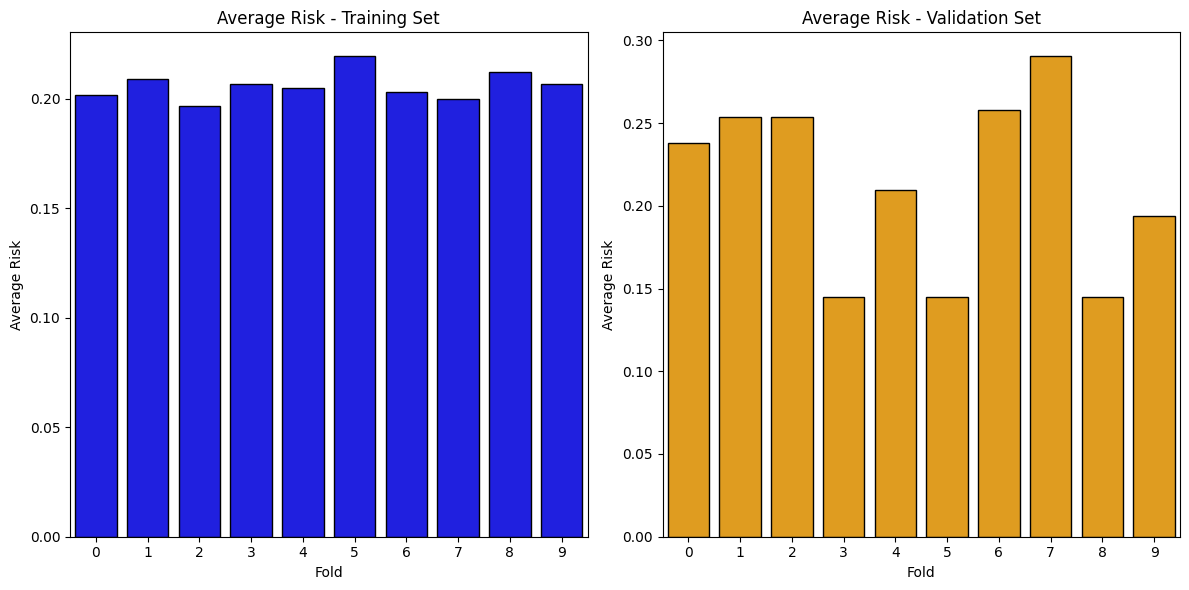

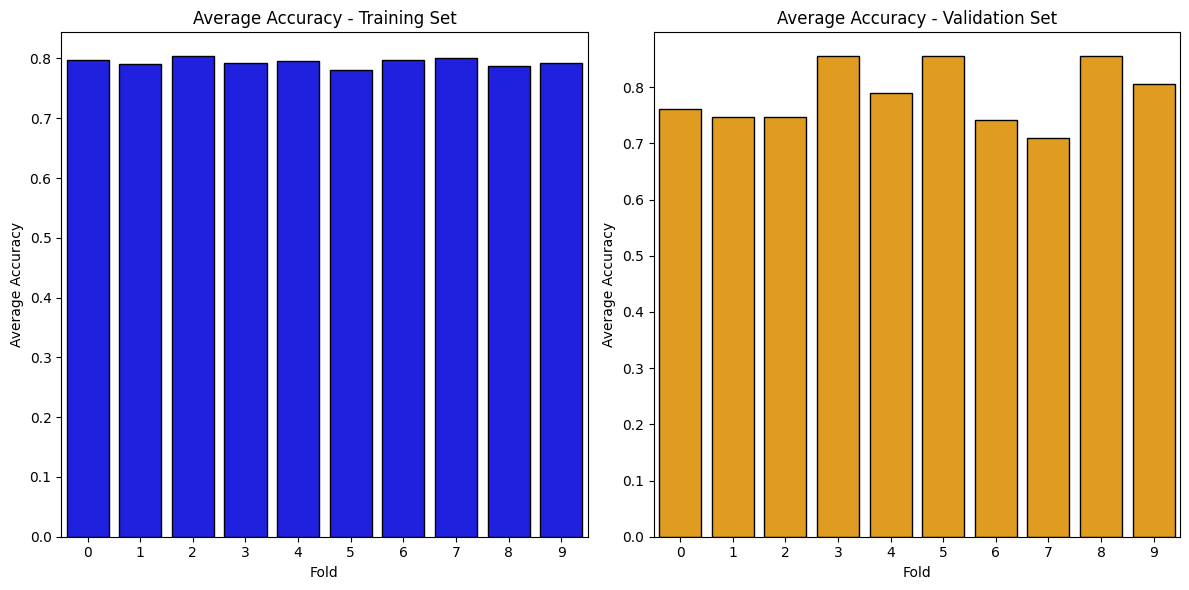

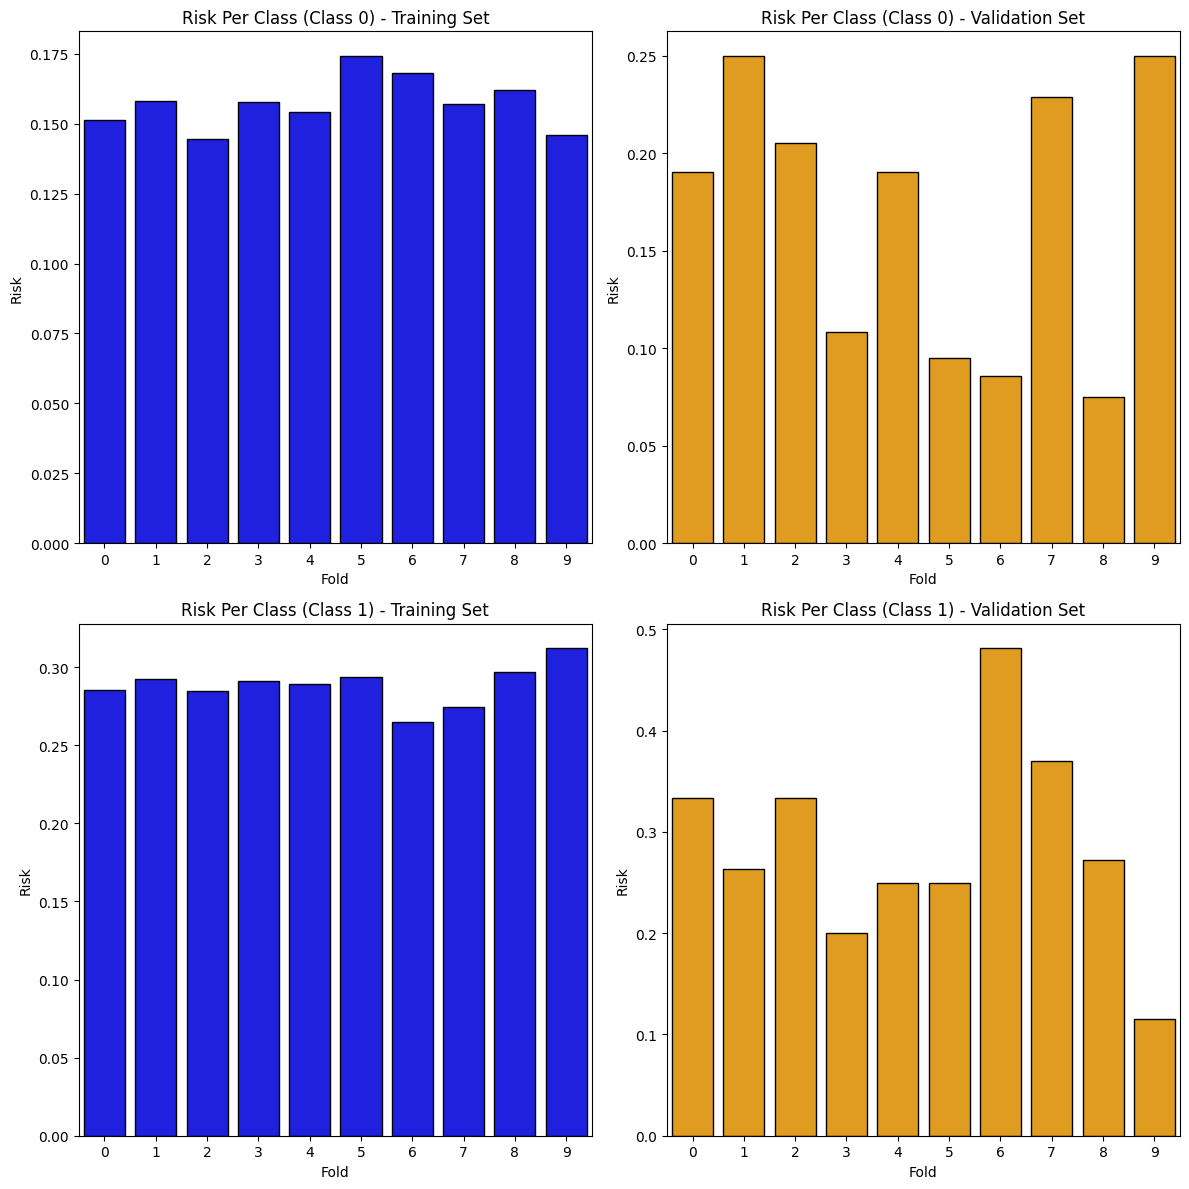

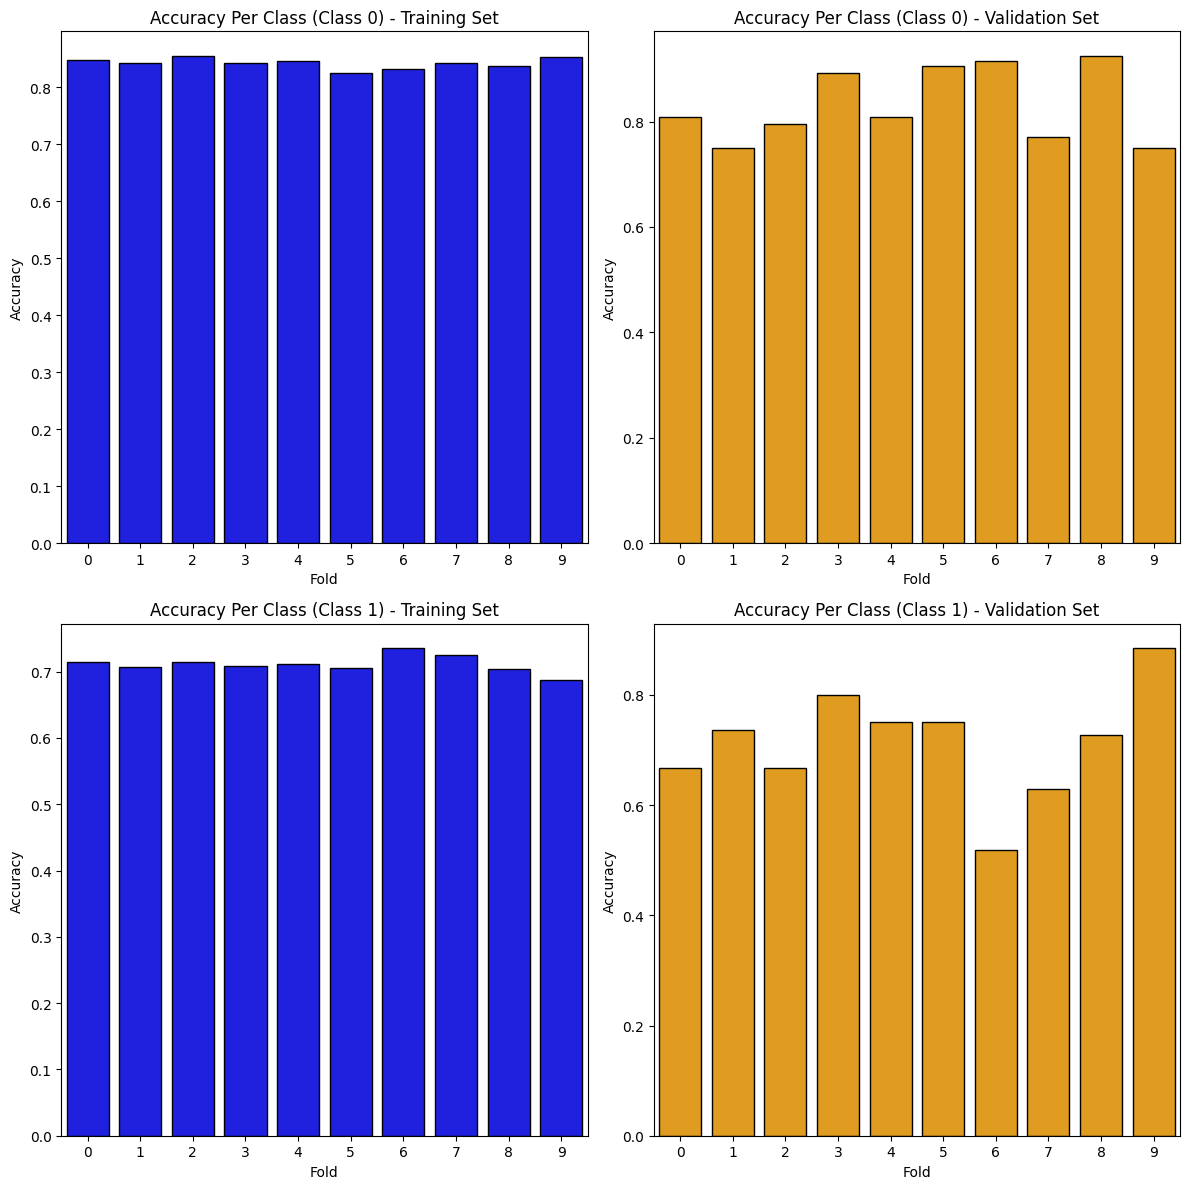

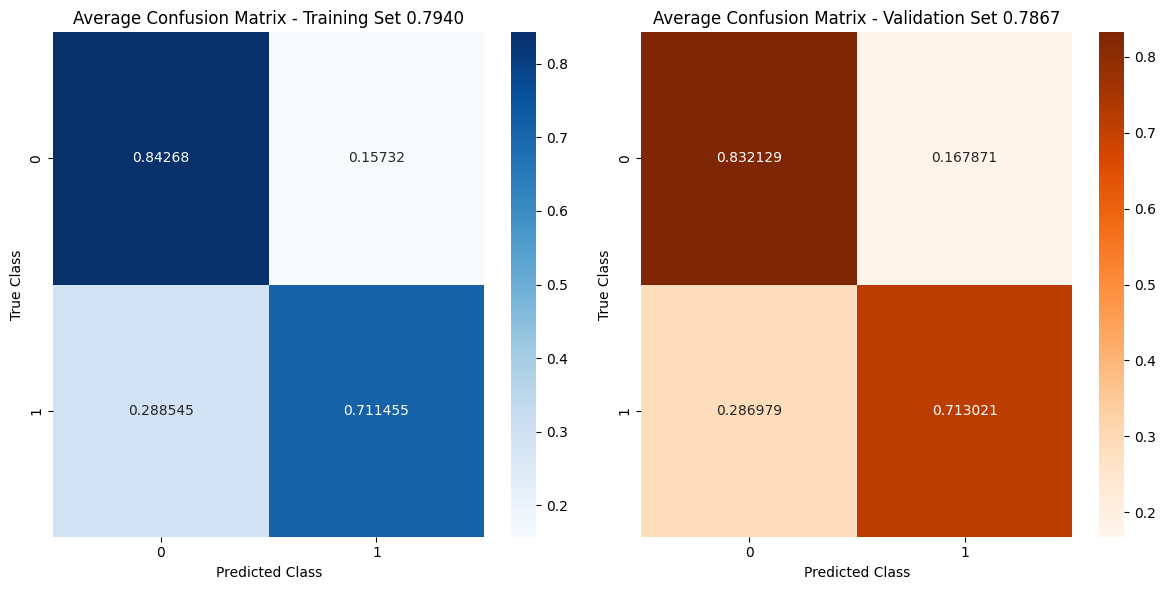

In [316]:
#Validation Croisée
nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train_bayes = np.zeros((nbFolds, 1))
stock_average_risk_Val_bayes = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_bayes = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_bayes = np.zeros((nbFolds, K))

stock_Accuracy_Train_bayes = np.zeros(nbFolds)
stock_Accuracy_Val_bayes = np.zeros(nbFolds)

stock_AccPerClass_Train_bayes = np.zeros((nbFolds, K))
stock_AccPerClass_Val_bayes = np.zeros((nbFolds, K))

stock_ConfMat_Train_bayes = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_bayes = np.zeros((nbFolds, K, K))

best_fold_XTrain = None
best_fold_YRTrain = None
best_fold_YhatTrainCBN = None
max_accuracy = 0.0

f = 0

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    model_CBN = GaussianNB()
    model_CBN.fit(XTrain, YRTrain.ravel())

    # Prediction on the training samples
    YhatTrainCBN = model_CBN.predict(XTrain)
    stock_average_risk_Train_bayes[f, 0] = compute_average_risk(YRTrain, YhatTrainCBN, K, L)
    stock_RiskPerClass_Train_bayes[f, :] = compute_risk_per_class(YRTrain, YhatTrainCBN, K, L)
    stock_Accuracy_Train_bayes[f] = compute_accuracy(YRTrain, YhatTrainCBN)
    stock_AccPerClass_Train_bayes[f, :] = compute_accuracy_per_class(YRTrain, YhatTrainCBN, K)
    stock_ConfMat_Train_bayes[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrainCBN, K)

    # Prediction on the testing samples
    YhatValCBN = model_CBN.predict(XVal)
    stock_average_risk_Val_bayes[f, 0] = compute_average_risk(YRVal, YhatValCBN, K, L)
    stock_RiskPerClass_Val_bayes[f, :] = compute_risk_per_class(YRVal, YhatValCBN, K, L)
    stock_Accuracy_Val_bayes[f] = compute_accuracy(YRVal, YhatValCBN)
    stock_AccPerClass_Val_bayes[f, :] = compute_accuracy_per_class(YRVal, YhatValCBN, K)
    stock_ConfMat_Val_bayes[f, :, :] = compute_confusion_matrix(YRVal, YhatValCBN, K)

    accuracy_val = compute_accuracy(YRTrain, YhatTrainCBN)
    if accuracy_val > max_accuracy:
        max_accuracy = accuracy_val
        best_fold_XTrain = XTrain
        best_fold_YRTrain = YRTrain
        best_fold_YhatTrainCBN = YhatTrainCBN

    f = f + 1

# Afficher le risque moyen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train_bayes.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val_bayes.ravel(), color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuarcy moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_bayes, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_bayes, color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Aficher risk per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train_bayes[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train_bayes[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val_bayes[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val_bayes[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuracy per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Train_bayes[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot  Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Train_bayes[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot  Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Val_bayes[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_AccPerClass_Val_bayes[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Accuracy Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


# Afficher la matrice de confusion moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train_bayes, 0), annot=True, cmap='Blues', fmt='g')
plt.title(f'Average Confusion Matrix - Training Set {np.mean(stock_Accuracy_Train_bayes):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val_bayes, 0), annot=True, cmap='Oranges', fmt='g')
plt.title(f'Average Confusion Matrix - Validation Set {np.mean(stock_Accuracy_Val_bayes):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 20% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augemente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est 28% environ contre à peine 15% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie d'avantage mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de valisation fluctue entre 70% et 85% environ.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6).
Pour la figure 5, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par ces valeurs:\begin{bmatrix} 0.84 & 0.16 \\ 0.29 & 0.71 \end{bmatrix}\ Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 84% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 71% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est "celle des morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 16% des échantillons positifs comme négatifs (False Negatives) et 29% des échantillons négatifs comme positifs (False Positives). Autrement dit 16% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 29% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.84 & 0.16 \\ 0.29 & 0.71 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 84% de précision pour la classe positive et 71% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.16 et 0.29, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

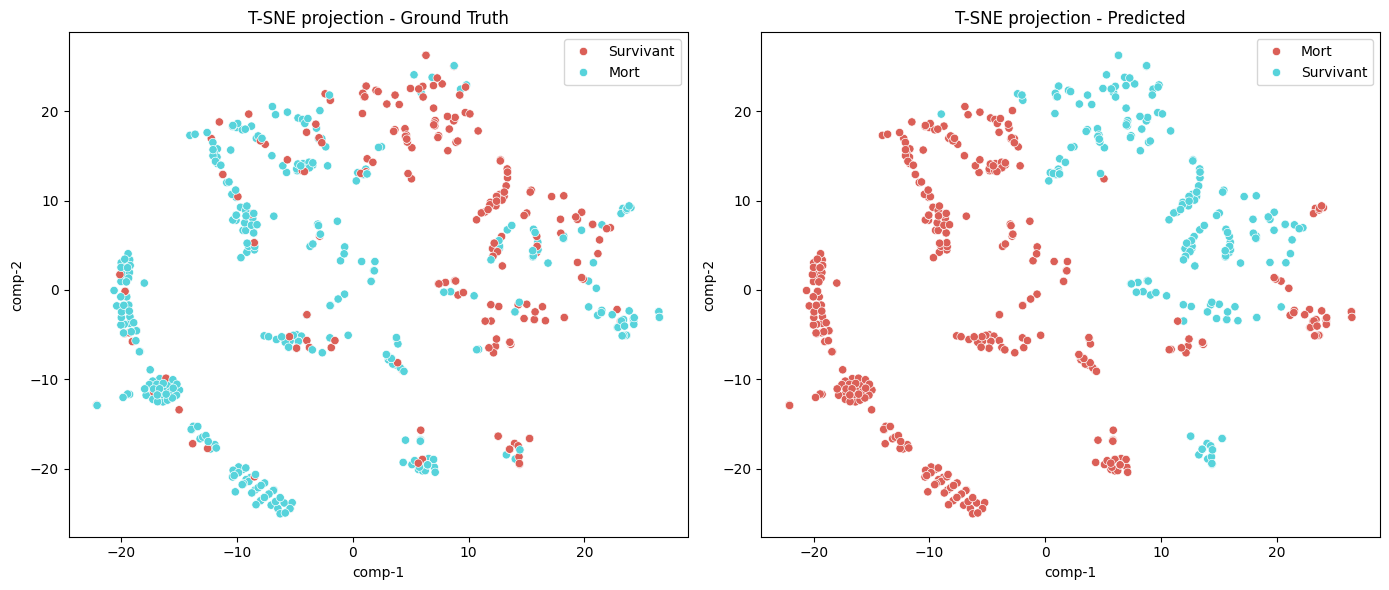

In [317]:
# TSNE projection - Ground Truth vs Predicted
plt.figure(figsize=(14, 6))

# Aficher Ground Truth
plt.subplot(1, 2, 1)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YRTrain
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Ground Truth")

# Aficher Predicted
plt.subplot(1, 2, 2)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YhatTrainCBN
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Predicted")

plt.tight_layout()
plt.show()

## Classifieur Regression Logistique



Nous appliquons actuellement une régression logistique .
Concrètement, la régression logistique nous permet de créer un modèle prédictif capable de classer les passagers en deux catégories distinctes : ceux qui ont survécu et ceux qui n'ont pas survécu au naufrage du Titanic. Cette technique est particulièrement adaptée aux problèmes de classification binaire comme le nôtre.

Tout d'abord, le modèle de régression logistique va être instancié avec des paramètres tels que `max_iter=1000` pour spécifier le nombre maximal d'itérations, et `random_state=42` pour assurer la reproductibilité des résultats.
Le modèle est ensuite entraîné sur les données d'entraînement (`X_train`, `y_train`) et évalué sur les données de test.

Ensuite, nous appliquons deux techniques de réduction de dimensionnalité : l'analyse en composantes principales (PCA) et l'embedding stochastique voisin en t-distribution (TSNE).
PCA est une technique de réduction de dimensionnalité qui identifie les axes principaux le long desquels les données varient le plus. Elle projette ensuite les données d'origine sur ces axes pour créer de nouvelles variables, préservant la variance maximale. Cela simplifie la représentation des données tout en minimisant la perte d'information.
TSNE est une méthode de réduction de dimensionnalité non linéaire utilisée principalement pour visualiser des données complexes à haute dimension. Elle mesure les similarités entre les paires de points dans l'espace d'origine, puis cherche à les représenter dans un espace de dimension réduite de manière à préserver ces similarités. C'est particulièrement efficace pour conserver les structures de clusters dans les données.

 Finalement, des graphiques de dispersion sont générés pour visualiser la répartition des points dans l'espace réduit à l'aide de PCA et TSNE, chacun coloré selon les prédictions de la régression logistique. Ces graphiques offrent un aperçu visuel de la séparation des classes dans l'espace réduit.

Accuracy du modèle Regression Logistique: 0.11
Accuracy du modèle Regression Logistique pca: 0.68
Accuracy du modèle Regression Logistique tsne: 0.77


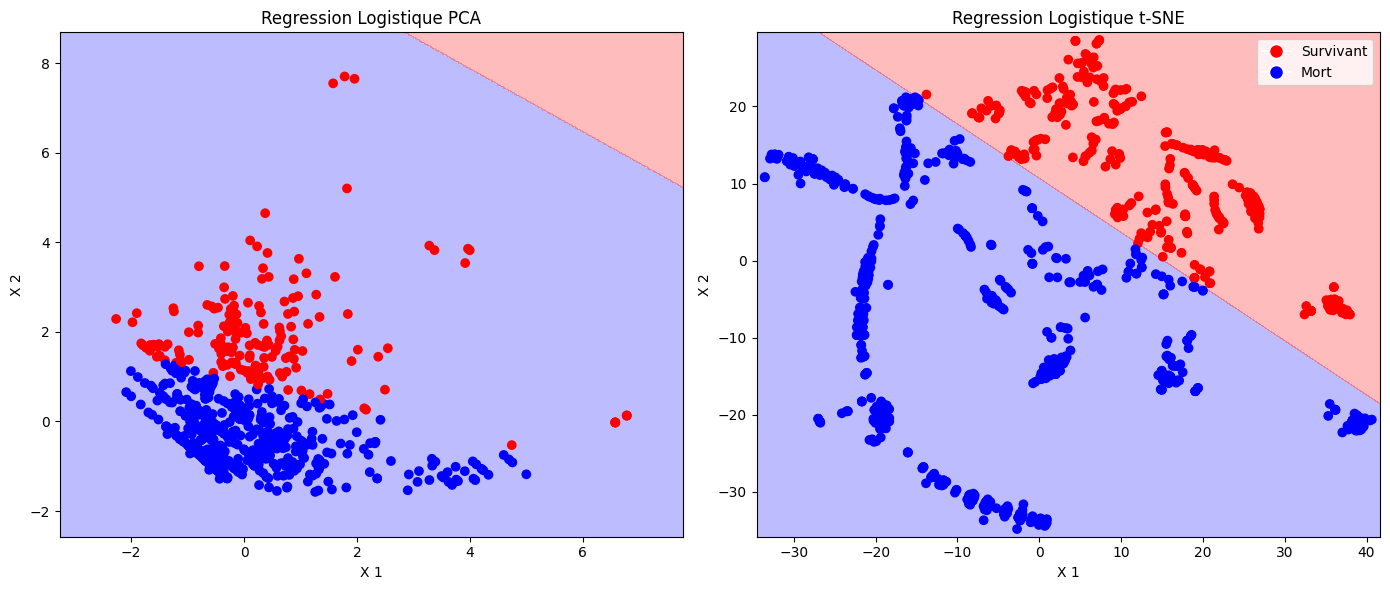

In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

logistique_model = LogisticRegression(max_iter=1000, random_state=42)

logistique_model.fit(X_train, y_train)
predictions_rl = logistique_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, predictions_rl)

conf_matrix_rl = confusion_matrix(y_test, predictions_rl)

print(f'Accuracy du modèle Regression Logistique: {accuracy_logistic:.2f}')


# Apliquer le PCA pour réduire à 2 dimensions

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

logistique_model.fit(X_pca, y)

predictions_rl_pca = logistique_model.predict(X_pca)
accuracy_logistic_pca = accuracy_score(y, predictions_rl_pca)
conf_matrix_rl_pca = confusion_matrix(y, predictions_rl_pca)

print(f'Accuracy du modèle Regression Logistique pca: {accuracy_logistic_pca:.2f}')



# Apliquer le TSNE pour réduire à 2 dimensions

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

logistique_model.fit(X_tsne, y)

predictions_rl_tsne = logistique_model.predict(X_tsne)
accuracy_logistic_tsne = accuracy_score(y, predictions_rl_tsne)
conf_matrix_rl_tsne = confusion_matrix(y, predictions_rl_tsne)

print(f'Accuracy du modèle Regression Logistique tsne: {accuracy_logistic_tsne:.2f}')



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix

# ... (votre code existant)

# Afficher les graphiques avec couleurs de fond, frontières de décision et légendes personnalisées

# Fonction pour tracer la frontière de décision
def plot_decision_boundary(model, X, y, ax, title):
    h = .02  # pas de la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Ajouter des couleurs de fond
    ax.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Fonction pour tracer les points de données avec légendes personnalisées
def plot_scatter(ax, X, predictions, title):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='o', label='Prédictions')

    # Créer une légende personnalisée
    classes = [ "Mort", "Survivant"]
    legend_labels = {i: label for i, label in enumerate(classes)}
    scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
    contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
    plt.legend(handles=[scatter_legend, contour_legend])

    ax.set_title(title)
    ax.set_xlabel('X 1')
    ax.set_ylabel('X 2')

# Afficher le graphique PCA
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Afficher avec couleurs de fond, frontières de décision et légendes personnalisées
#frontières de décision du PCA , bof , à enlever?
plot_decision_boundary(logistique_model, X_pca, y, axes[0], 'Regression Logistique PCA')
plot_scatter(axes[0], X_pca, predictions_rl_pca, 'Regression Logistique PCA')

# Afficher le graphique t-SNE
# Répéter le processus pour t-SNE
X_tsne = tsne.fit_transform(X)
logistique_model.fit(X_tsne, y)
predictions_rl_tsne = logistique_model.predict(X_tsne)

# Afficher avec couleurs de fond, frontières de décision et légendes personnalisées
plot_decision_boundary(logistique_model, X_tsne, y, axes[1], 'Regression Logistique t-SNE')
plot_scatter(axes[1], X_tsne, predictions_rl_tsne, 'Regression Logistique t-SNE')

plt.tight_layout()
plt.show()


Nous mettons ensuite en œuvre une validation croisée à 10 folds avec une régression logistique dans le cadre de l'apprentissage sur notre base de données Titanic. La validation croisée est une technique permettant d'évaluer la performance du modèle de manière plus robuste en le testant sur plusieurs sous-ensembles de données.
Les mesures telles que le risque moyen, le risque par classe, l'exactitude moyenne et la matrice de confusion sont calculées et stockées à chaque fois.

Les graphiques générés présentent les résultats de la validation croisée. Le premier graphique montre le risque moyen sur les ensembles d'entraînement et de validation. Le deuxième graphique présente l'exactitude moyenne sur les deux ensembles. Enfin, la matrice de confusion moyenne est affichée pour les ensembles d'entraînement et de validation.

Ces visualisations offrent un aperçu de la performance du modèle sur différents plis, permettant ainsi d'évaluer sa robustesse et sa capacité à généraliser sur des données non vues.

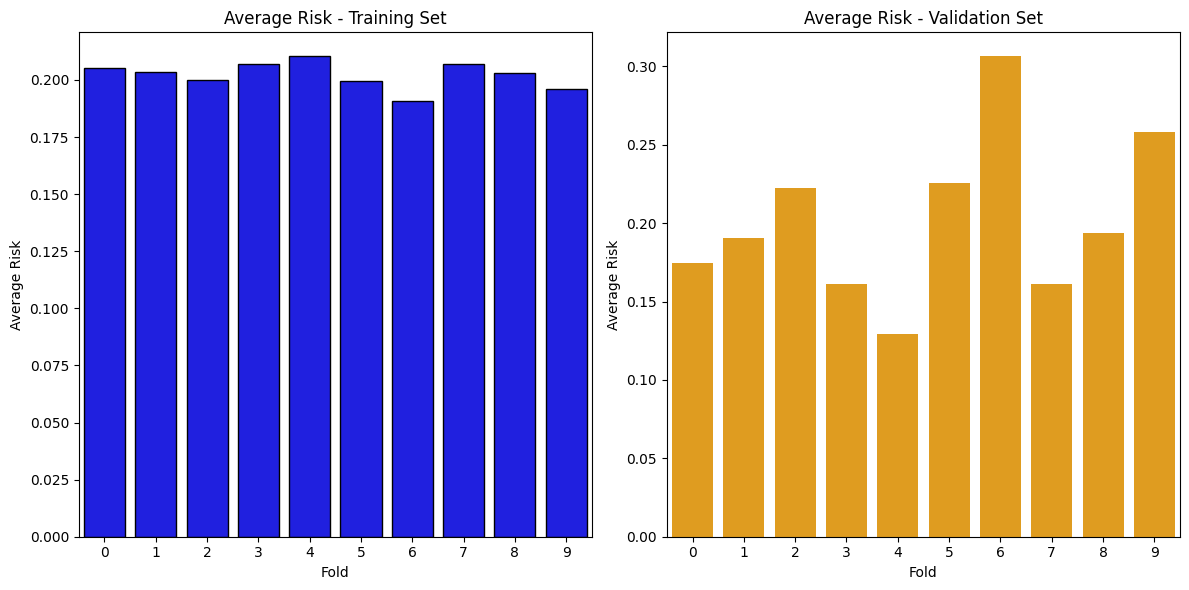

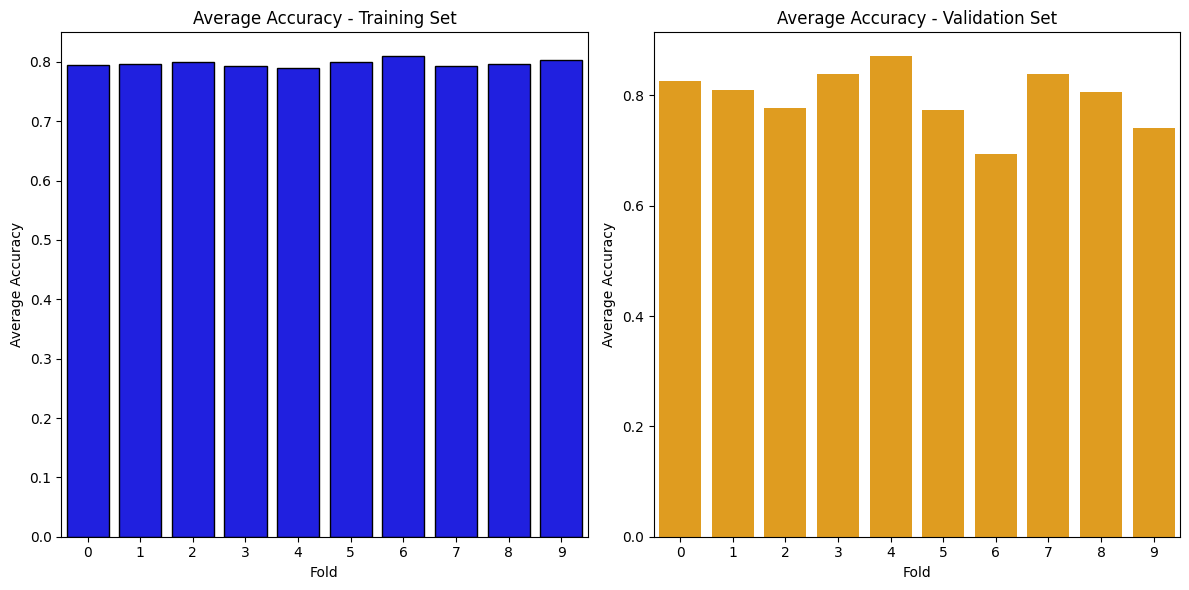

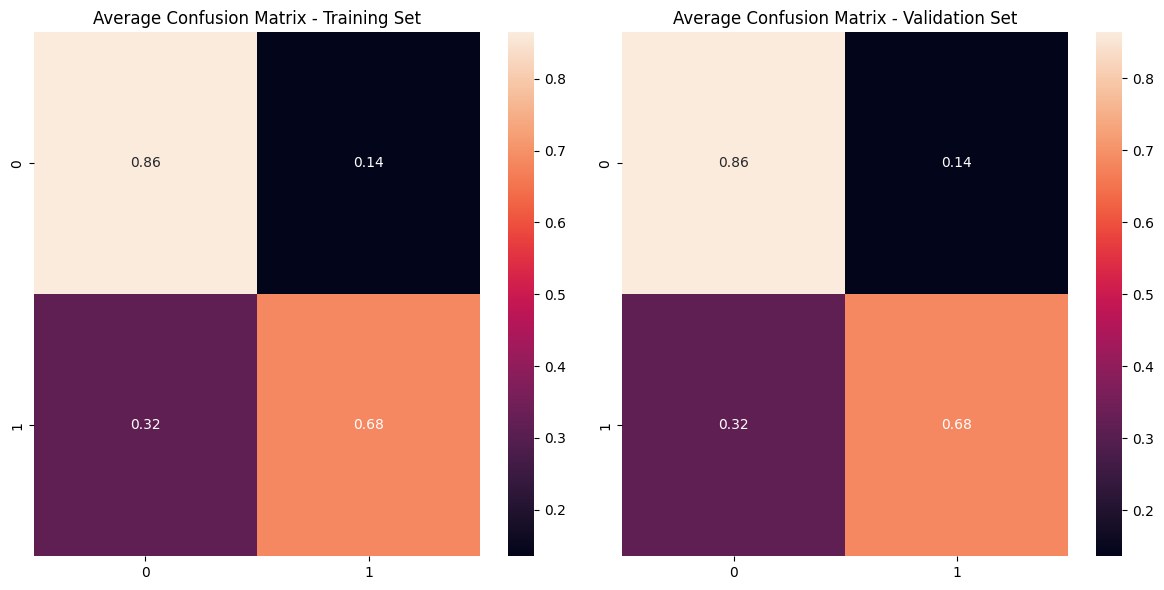

In [412]:
np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train_rl = np.zeros((nbFolds, 1))
stock_average_risk_Val_rl = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_rl = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_rl = np.zeros((nbFolds, K))

stock_Accuracy_Train_rl = np.zeros(nbFolds)
stock_Accuracy_Val_rl = np.zeros(nbFolds)

stock_AccPerClass_Train_rl = np.zeros((nbFolds, K))
stock_AccPerClass_Val_rl = np.zeros((nbFolds, K))

stock_ConfMat_Train_rl = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_rl = np.zeros((nbFolds, K, K))

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    logistique_model = LogisticRegression(max_iter=1000, random_state=42)
    logistique_model.fit(X_train, y_train)

    # Prediction on the training samples
    YhatTrain_lr = logistique_model.predict(XTrain)
    stock_average_risk_Train[f, 0] = compute_average_risk(YRTrain, YhatTrain_lr, K, L)
    stock_RiskPerClass_Train[f, :] = compute_risk_per_class(YRTrain, YhatTrain_lr, K, L)
    stock_Accuracy_Train[f] = compute_accuracy(YRTrain, YhatTrain_lr)
    stock_AccPerClass_Train[f, :] = compute_accuracy_per_class(YRTrain, YhatTrain_lr, K)
    stock_ConfMat_Train[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrain_lr, K)

    # Prediction on the testing samples
    YhatVal_lr = logistique_model.predict(XVal)
    stock_average_risk_Val[f, 0] = compute_average_risk(YRVal, YhatVal_lr, K, L)
    stock_RiskPerClass_Val[f, :] = compute_risk_per_class(YRVal, YhatVal_lr, K, L)
    stock_Accuracy_Val[f] = compute_accuracy(YRVal, YhatVal_lr)
    stock_AccPerClass_Val[f, :] = compute_accuracy_per_class(YRVal, YhatVal_lr, K)
    stock_ConfMat_Val[f, :, :] = compute_confusion_matrix(YRVal, YhatVal_lr, K)

    f = f + 1


#  plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()

Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 20% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augemente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est 30% environ contre un peu moins de 15% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie légèrement mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de valisation se situe autour de 80%.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6).
Pour la figure 5, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par ces valeurs:\begin{bmatrix} 0.86 & 0.14 \\ 0.32 & 0.68 \end{bmatrix}\ Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 86% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 68% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est "celle des morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 14% des échantillons positifs comme négatifs (False Negatives) et 32% des échantillons négatifs comme positifs (False Positives). Autrement dit 14% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 32% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.86 & 0.14 \\ 0.32 & 0.68 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 86% de précision pour la classe positive et 68% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.14 et 0.32, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

## Classifieur Arbre de décision


Les classifieurs d'arbres de décision sont des outils puissants et polyvalents utilisés dans le domaine de l'apprentissage automatique pour la classification et la prédiction.

Dans le cadre de notre projet, nous souhaitons appliquer ces classifieurs à notre base de données spécifique. Le critère de Gini, qui mesure la pureté des nœuds, sera crucial pour évaluer la qualité des décisions prises à chaque étape de la construction de l'arbre. Nous visons à minimiser le critère de Gini pour obtenir des nœuds plus purs, facilitant ainsi une classification précise.
Un autre paramètre essentiel est l'alpha, ou coefficient d'élagage, qui joue un rôle majeur dans la régulation de la complexité de l'arbre. En ajustant l'alpha, nous cherchons à équilibrer la capacité de notre arbre à s'adapter aux données d'entraînement sans tomber dans le piège du surajustement. Cette étape est cruciale pour garantir que notre modèle puisse généraliser efficacement à de nouvelles données.

Lors de l'entraînement du classifieur d'arbres de décision sur notre base de données, nous explorons différentes valeurs de critère de Gini et d'alpha. Notre objectif est de trouver la combinaison optimale de ces paramètres, celle qui maximise les performances de notre modèle tout en préservant sa capacité à généraliser. Ce processus itératif nous permettra de tirer le meilleur parti de notre classifieur d'arbres de décision pour notre cas d'utilisation spécifique. En adaptant ces modèles à nos besoins spécifiques, nous pouvons exploiter pleinement leur transparence et leur interprétabilité pour prendre des décisions éclairées en fonction de nos données.

### Arbre de décision avec critère d'arrêt: alpha

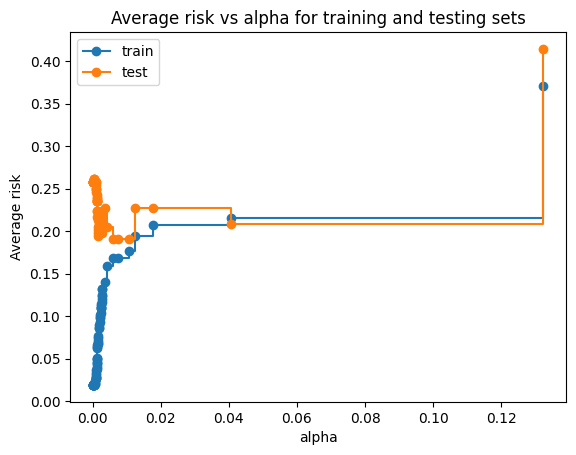

Nb feuilles DT_elague = 7


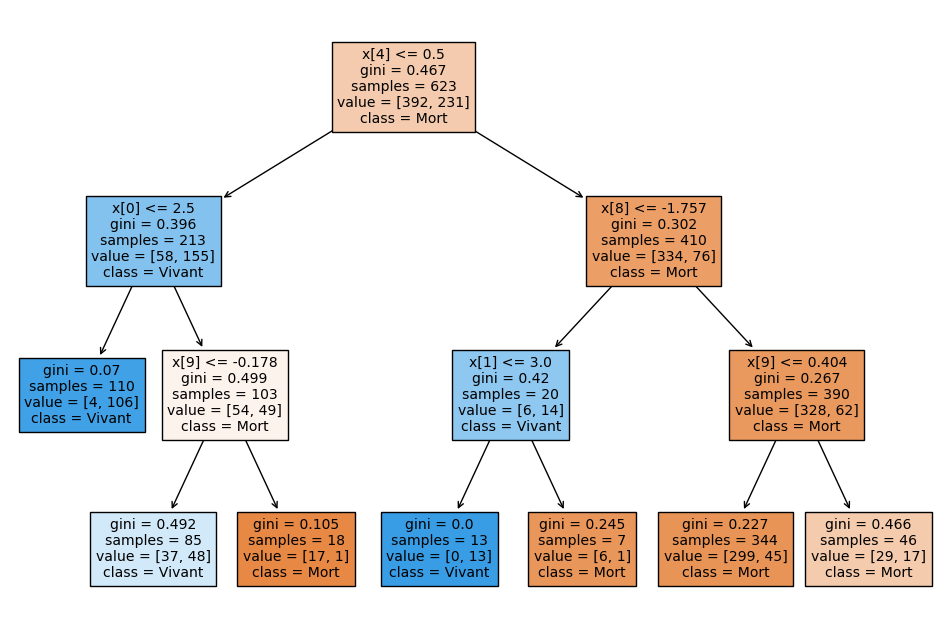

Accuracy du modèle arbre de décision élagué avec t-SNE: 0.83


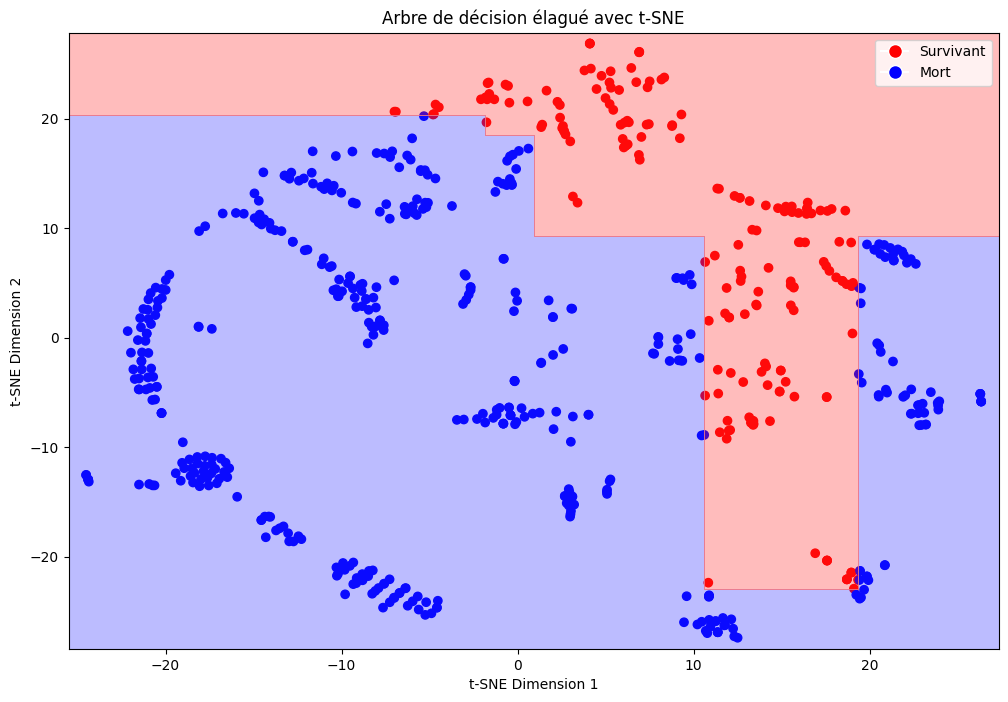

In [382]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE


y_train = y_train.ravel() - 1

# Fit Decision Tree avec élagage
DT = DecisionTreeClassifier(random_state=0)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Compute risks versus Alpha
stocks_DT = []
stock_risk_train = []
stock_risk_test = []

for ccp_alpha in ccp_alphas:
    DT_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT_alpha.fit(X_train, y_train)
    stocks_DT.append(DT_alpha)
    # Risk Train DT :
    YhatTrain = DT_alpha.predict(X_train)
    stock_risk_train.append(1 - np.sum(y_train == YhatTrain) / len(y_train))
    # Risk Test DT :
    YhatTest = DT_alpha.predict(X_test)
    stock_risk_test.append(1 - np.sum(y_test == YhatTest) / len(y_test))

# Plot figure Risk versus Alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Average risk")
ax.set_title("Average risk vs alpha for training and testing sets")
ax.plot(ccp_alphas, stock_risk_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, stock_risk_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Entraîner le modèle d'arbre de décision avec le meilleur alpha
best_alpha = ccp_alphas[np.argmin(stock_risk_test)]
DT_elague = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
DT_elague.fit(X_train, y_train)

# Vérification du nombre de feuilles terminales
nb_leaves = DT_elague.get_n_leaves()
print('Nb feuilles DT_elague =', nb_leaves)

# Visualiser l'arbre élagué
plt.figure(figsize=(12, 8))
plot_tree(DT_elague, filled=True, class_names=['Mort', 'Vivant'])
plt.show()




# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Entraîner le modèle d'arbre de décision élagué sur les données transformées par t-SNE
DT_elague.fit(X_tsne, y_train)

# Prédire avec le modèle élagué sur les données transformées par t-SNE
predictions_DT_elague_tsne = DT_elague.predict(X_tsne)
accuracy_DT_elague_tsne = accuracy_score(y_train, predictions_DT_elague_tsne)
conf_matrix_DT_elague_tsne = confusion_matrix(y_train, predictions_DT_elague_tsne)

print(f'Accuracy du modèle arbre de décision élagué avec t-SNE: {accuracy_DT_elague_tsne:.2f}')

# Tracer les points de données
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions_DT_elague_tsne, cmap='bwr', marker='o', label='Prédictions')

# Tracer la frontière de décision avec des couleurs de fond
h = .02  # Pas de la grille
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT_elague.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Créer une légende personnalisée
classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Arbre de décision élagué avec t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



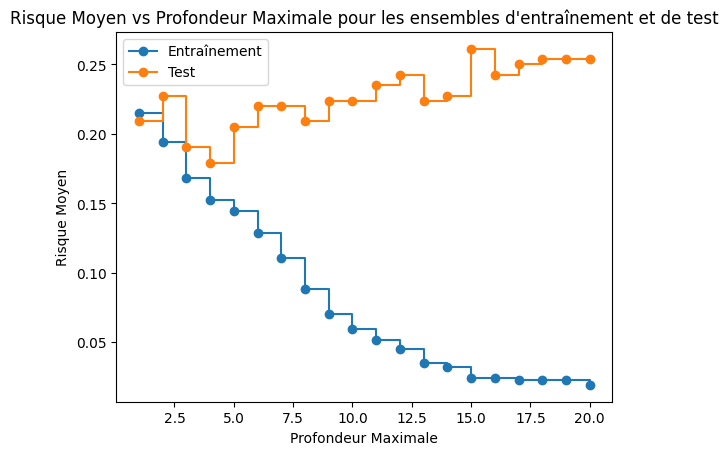

Nombre de feuilles pour le meilleur modèle : 15


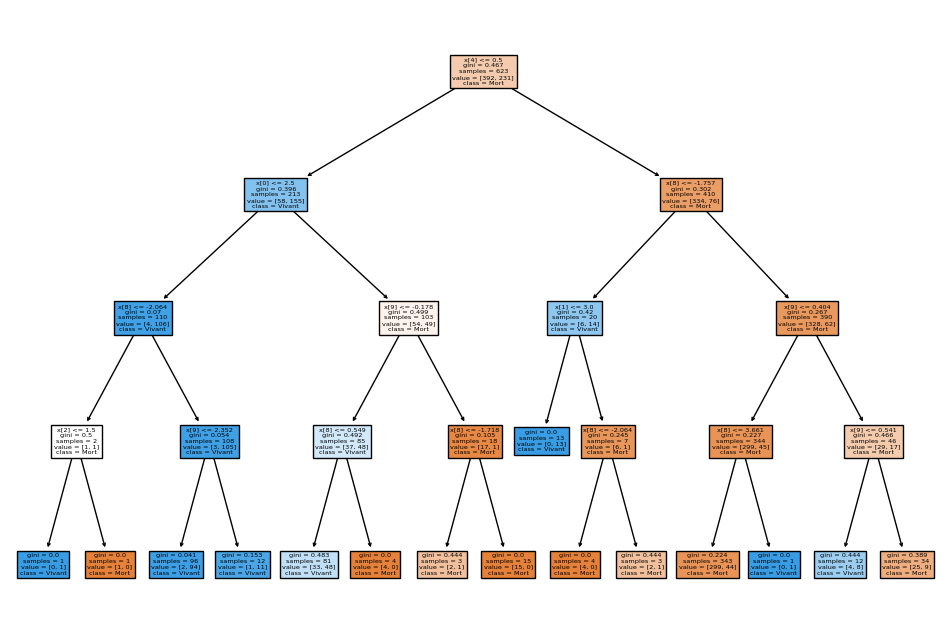

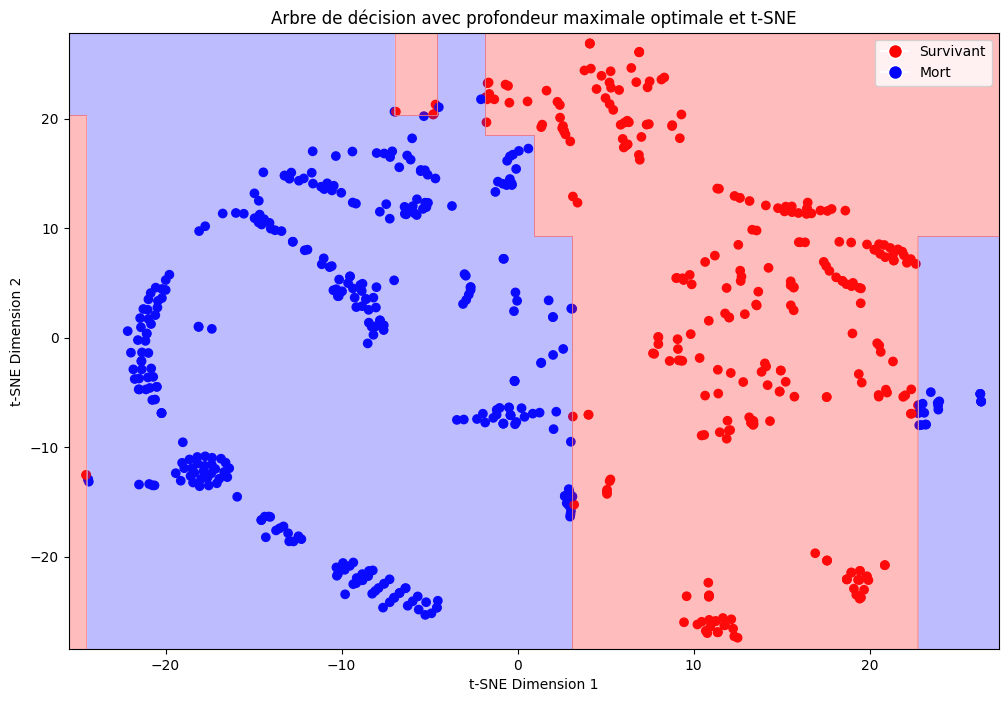

In [384]:
#arbre de decision avec critere de Gini comme condition d'arrêt

DT = DecisionTreeClassifier(random_state=0, criterion='gini')
max_depths = np.arange(1, 21)  # Définir la plage de profondeurs maximales à explorer

# Initialiser des listes pour stocker les résultats
stocks_DT = []
stock_risk_train = []
stock_risk_test = []

for max_depth in max_depths:
    DT_depth = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=max_depth)
    DT_depth.fit(X_train, y_train)
    stocks_DT.append(DT_depth)

    # Risque sur l'ensemble d'entraînement
    YhatTrain = DT_depth.predict(X_train)
    stock_risk_train.append(1 - accuracy_score(y_train, YhatTrain))

    # Risque sur l'ensemble de test
    YhatTest = DT_depth.predict(X_test)
    stock_risk_test.append(1 - accuracy_score(y_test, YhatTest))

# Tracer figure Risque versus Profondeur Maximale
fig, ax = plt.subplots()
ax.set_xlabel("Profondeur Maximale")
ax.set_ylabel("Risque Moyen")
ax.set_title("Risque Moyen vs Profondeur Maximale pour les ensembles d'entraînement et de test")
ax.plot(max_depths, stock_risk_train, marker="o", label="Entraînement", drawstyle="steps-post")
ax.plot(max_depths, stock_risk_test, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()

# Sélectionner le modèle avec la meilleure profondeur maximale
best_depth = max_depths[np.argmin(stock_risk_test)]
DT_best_depth = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=best_depth)
DT_best_depth.fit(X_train, y_train)

# Vérifier le nombre de feuilles terminales
nb_leaves_best_depth = DT_best_depth.get_n_leaves()
print('Nombre de feuilles pour le meilleur modèle :', nb_leaves_best_depth)

# Visualiser l'arbre avec la meilleure profondeur maximale
plt.figure(figsize=(12, 8))
plot_tree(DT_best_depth, filled=True, class_names=['Mort', 'Vivant'])
plt.show()

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Entraîner le modèle d'arbre de décision avec la meilleure profondeur maximale sur les données transformées par t-SNE
DT_best_depth.fit(X_tsne, y_train)

# Prédire avec le modèle sur les données transformées par t-SNE
predictions_DT_best_depth_tsne = DT_best_depth.predict(X_tsne)
accuracy_DT_best_depth_tsne = accuracy_score(y_train, predictions_DT_best_depth_tsne)
conf_matrix_DT_best_depth_tsne = confusion_matrix(y_train, predictions_DT_best_depth_tsne)

# Tracer les points de données
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions_DT_best_depth_tsne, cmap='bwr', marker='o', label='Prédictions')

# Tracer la frontière de décision avec des couleurs de fond
h = .02  # Pas de la grille
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT_best_depth.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Créer une légende personnalisée
classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Arbre de décision avec profondeur maximale optimale et t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


### Arbre de décision avec critère d'arrêt: Gini

### Validation croisée sans critère

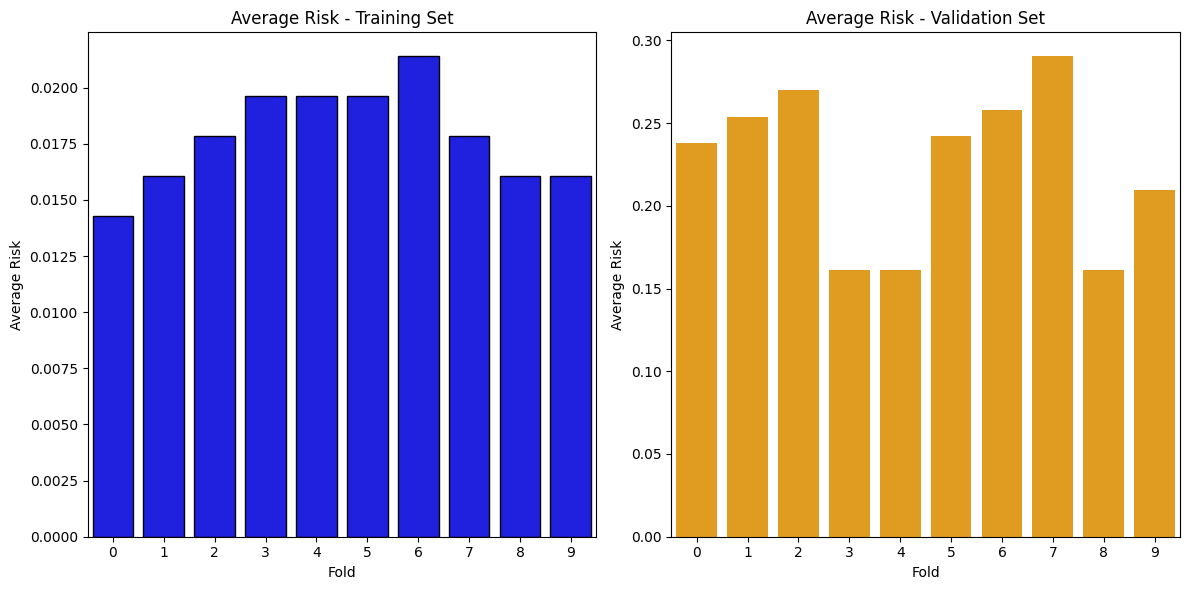

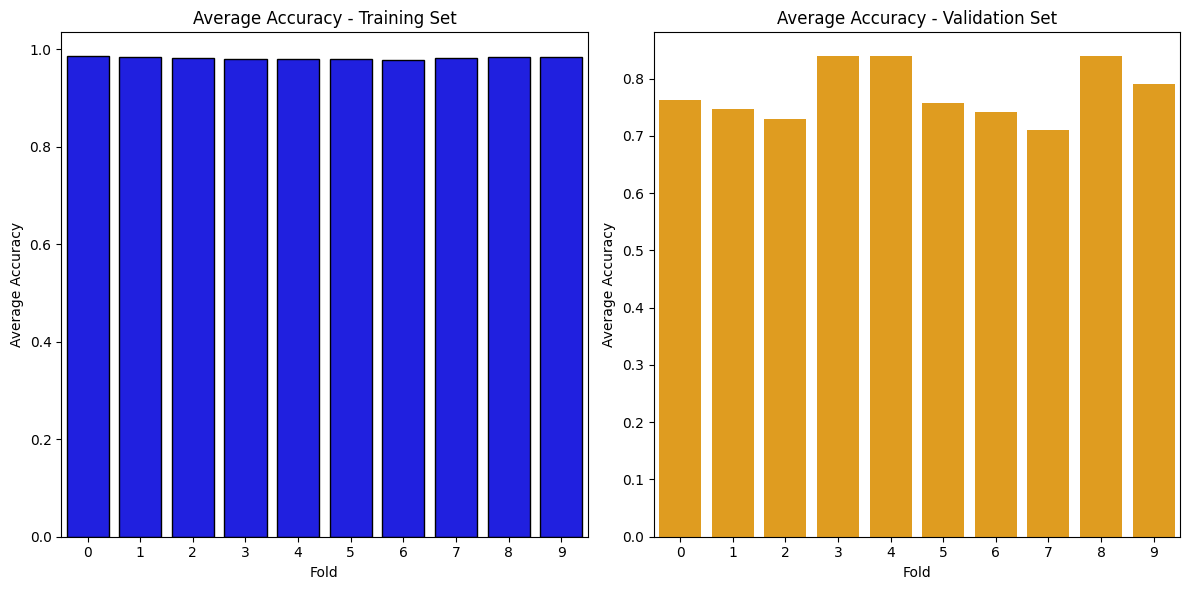

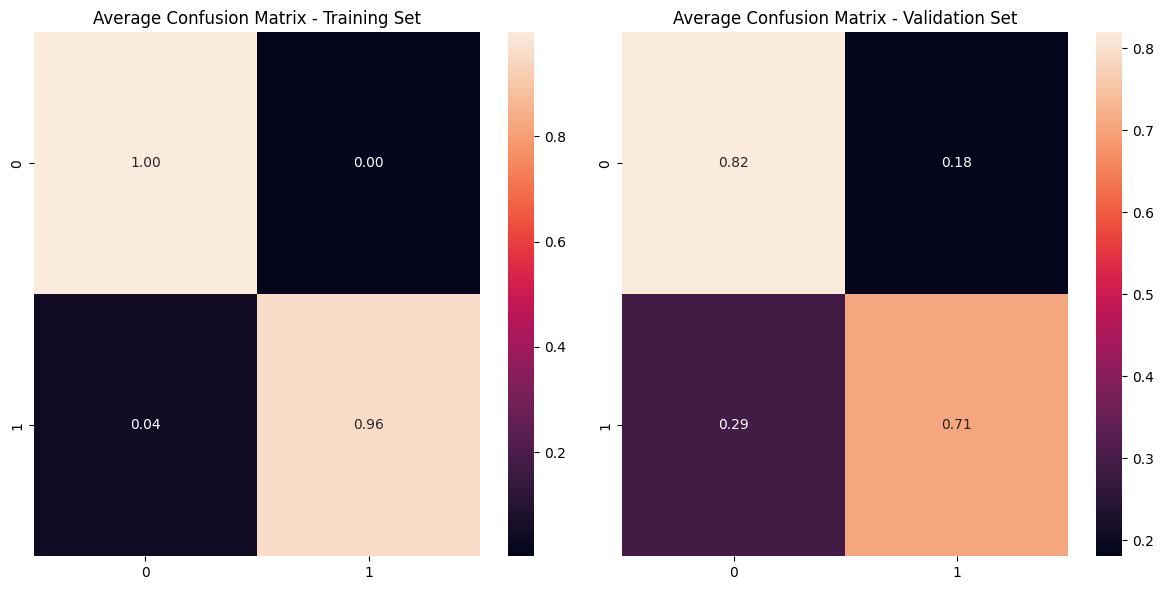

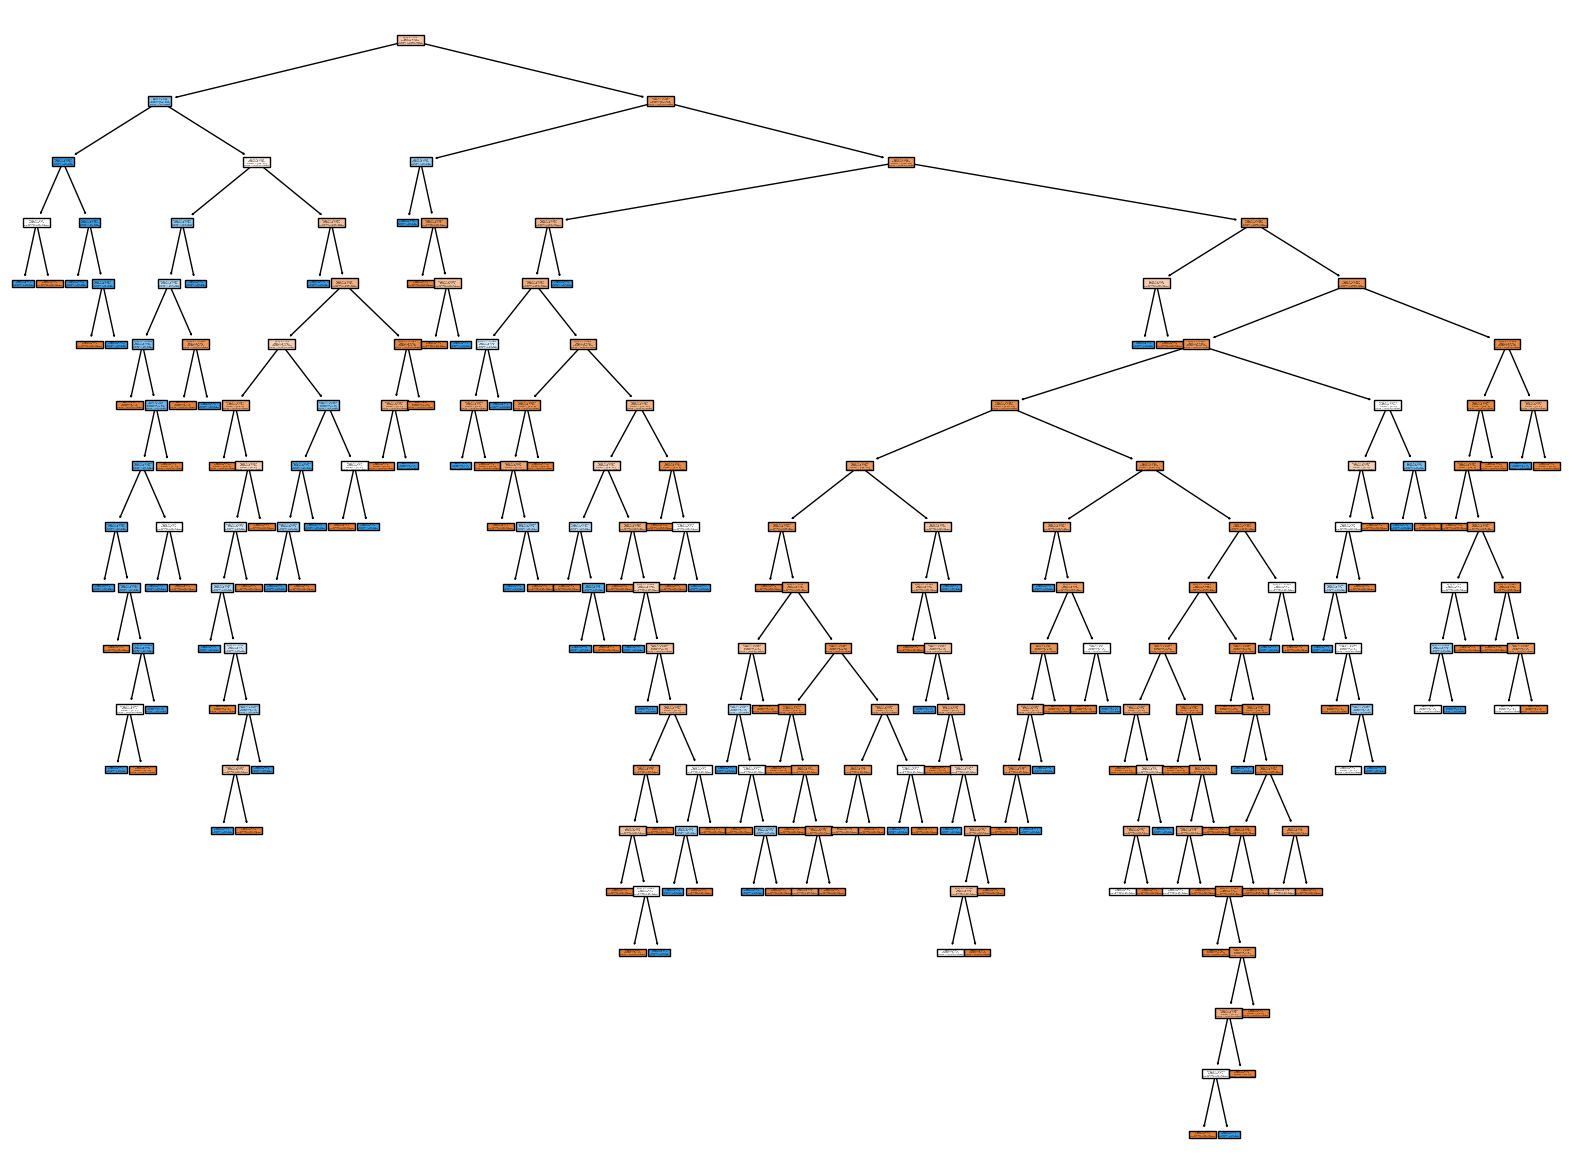

In [410]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

y_train = y_train.ravel() + 1

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train_DT = np.zeros((nbFolds, 1))
stock_average_risk_Val_DT = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_DT = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_DT = np.zeros((nbFolds, K))

stock_Accuracy_Train_DT = np.zeros(nbFolds)
stock_Accuracy_Val_DT = np.zeros(nbFolds)

stock_AccPerClass_Train_DT = np.zeros((nbFolds, K))
stock_AccPerClass_Val_DT = np.zeros((nbFolds, K))

stock_ConfMat_Train_DT = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_DT = np.zeros((nbFolds, K, K))

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    #DT_model = DecisionTreeClassifier(random_state=0)
    DT_model = DecisionTreeClassifier(random_state=0)
    DT_model.fit(XTrain, YRTrain)
    #path = DT.cost_complexity_pruning_path(X_train, y_train)

    # Prediction on the training samples
    YhatTrain_DT = DT_model.predict(XTrain)
    stock_average_risk_Train[f, 0] = compute_average_risk(YRTrain, YhatTrain_DT, K, L)
    stock_RiskPerClass_Train[f, :] = compute_risk_per_class(YRTrain, YhatTrain_DT, K, L)
    stock_Accuracy_Train[f] = compute_accuracy(YRTrain, YhatTrain_DT)
    stock_AccPerClass_Train[f, :] = compute_accuracy_per_class(YRTrain, YhatTrain_DT, K)
    stock_ConfMat_Train[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrain_DT, K)

    # Prediction on the testing samples
    YhatVal_DT = DT_model.predict(XVal)
    stock_average_risk_Val[f, 0] = compute_average_risk(YRVal, YhatVal_DT, K, L)
    stock_RiskPerClass_Val[f, :] = compute_risk_per_class(YRVal, YhatVal_DT, K, L)
    stock_Accuracy_Val[f] = compute_accuracy(YRVal, YhatVal_DT)
    stock_AccPerClass_Val[f, :] = compute_accuracy_per_class(YRVal, YhatVal_DT, K)
    stock_ConfMat_Val[f, :, :] = compute_confusion_matrix(YRVal, YhatVal_DT, K)

    f = f + 1


#  plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()


# Affichage de l'arbre de décision final
plt.figure(figsize=(20, 15))
plot_tree(DT_model, filled=True, class_names=['Not Survived', 'Survived'])
plt.show()


### Validation Croisée avec Critère alpha ?

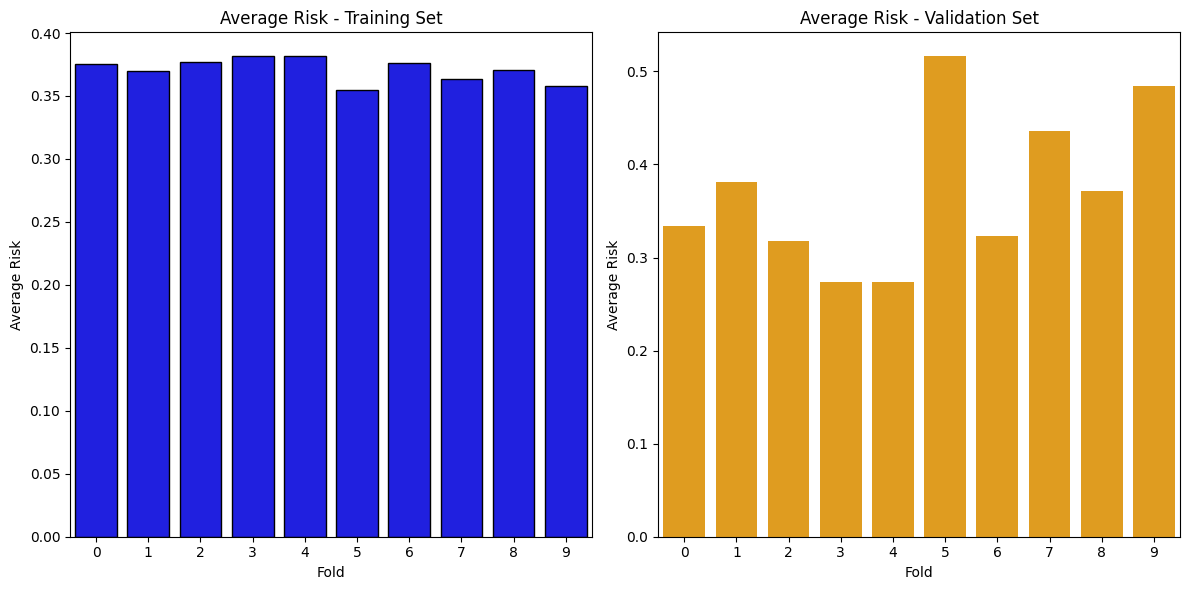

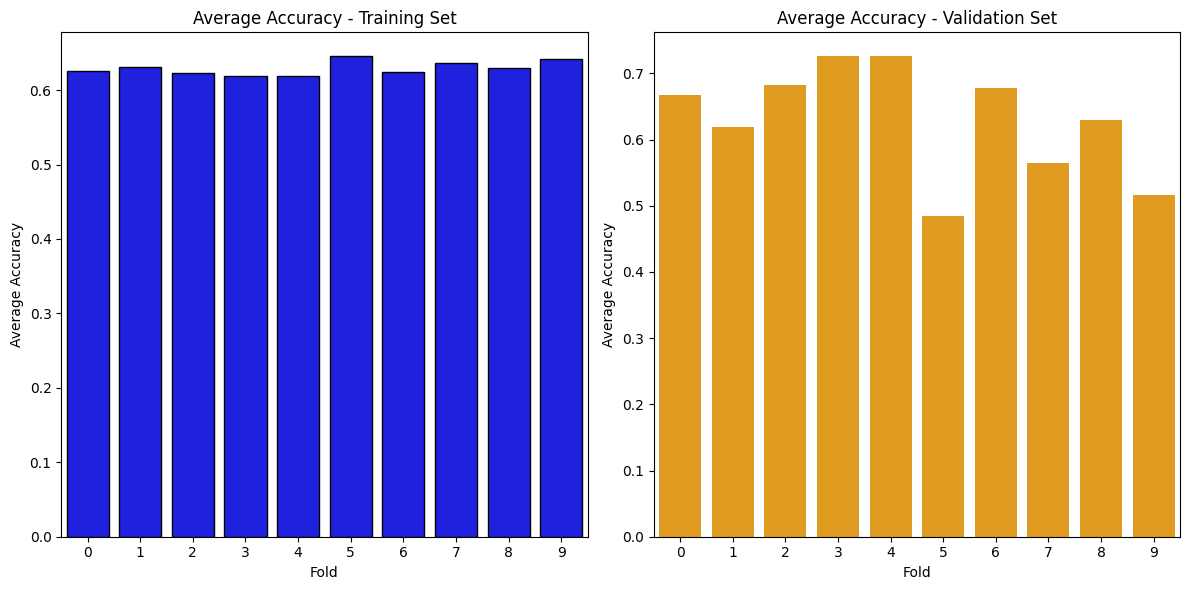

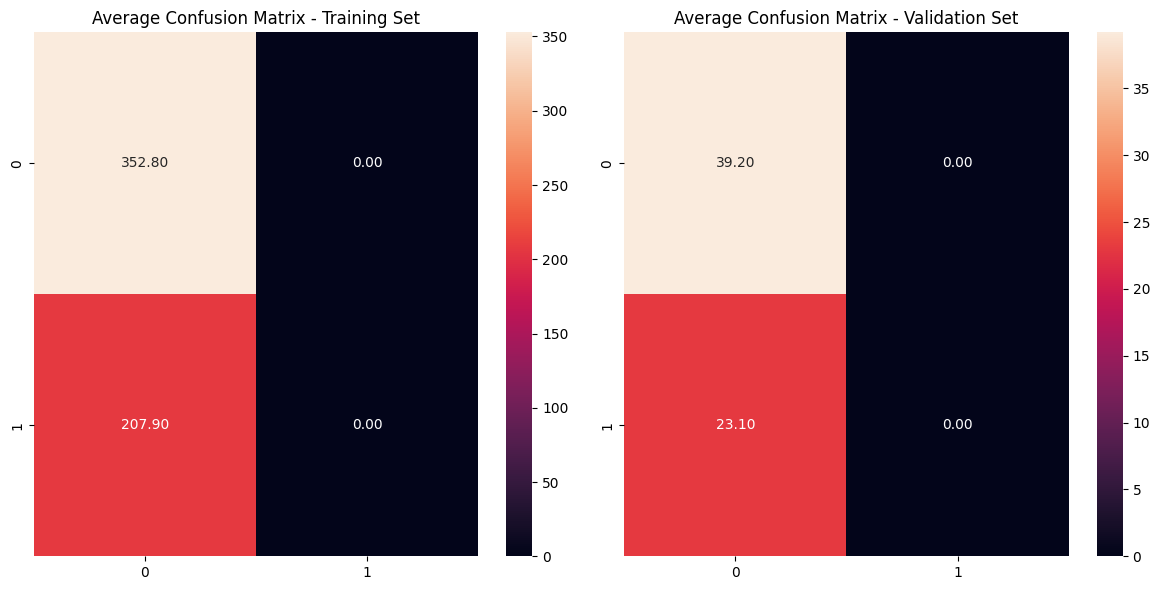

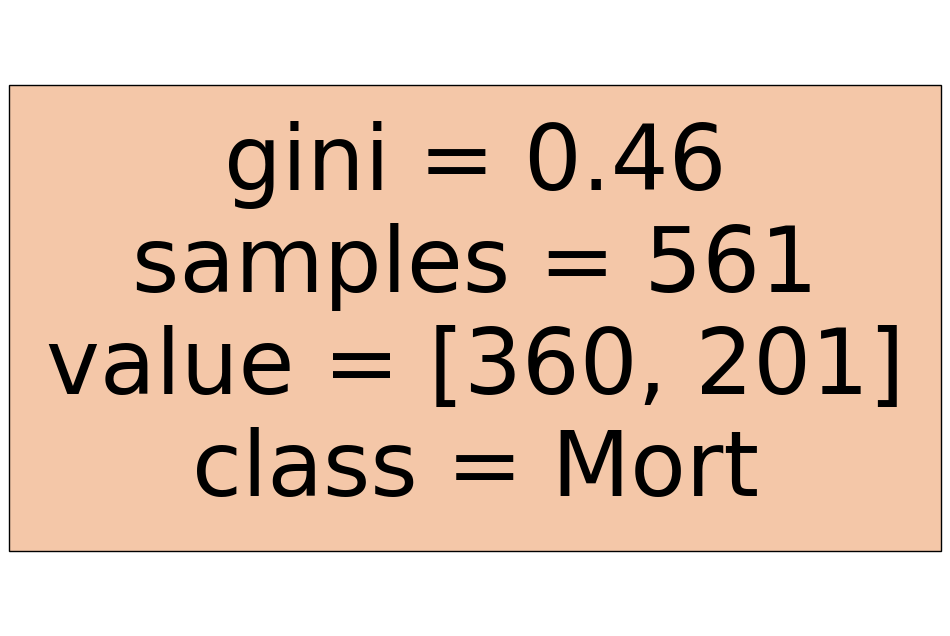

In [386]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

K = 2  # Assurez-vous de changer la valeur en fonction du nombre de classes

stock_average_risk_Train = np.zeros((nbFolds, 1))
stock_average_risk_Val = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train = np.zeros((nbFolds, K))
stock_RiskPerClass_Val = np.zeros((nbFolds, K))

stock_Accuracy_Train = np.zeros(nbFolds)
stock_Accuracy_Val = np.zeros(nbFolds)

stock_ConfMat_Train = np.zeros((nbFolds, K, K))
stock_ConfMat_Val = np.zeros((nbFolds, K, K))

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    # Obtenir le chemin de la complexité du coût
    path = DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(XTrain, YRTrain)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    # Choisir le meilleur alpha
    best_alpha = ccp_alphas[np.argmax(impurities)]

    # Création et entraînement du modèle d'arbre de décision avec le meilleur alpha
    DT_model = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
    DT_model.fit(XTrain, YRTrain)

    # Prediction on the training samples
    YhatTrain_DT = DT_model.predict(XTrain)
    stock_average_risk_Train[f, 0] = 1 - accuracy_score(YRTrain, YhatTrain_DT)
    stock_RiskPerClass_Train[f, :] = 1 - np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_DT[YRTrain == 0]),
                                                  accuracy_score(YRTrain[YRTrain == 1], YhatTrain_DT[YRTrain == 1])])
    stock_Accuracy_Train[f] = accuracy_score(YRTrain, YhatTrain_DT)
    stock_ConfMat_Train[f, :, :] = confusion_matrix(YRTrain, YhatTrain_DT)

    # Prediction on the testing samples
    YhatVal_DT = DT_model.predict(XVal)
    stock_average_risk_Val[f, 0] = 1 - accuracy_score(YRVal, YhatVal_DT)
    stock_RiskPerClass_Val[f, :] = 1 - np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_DT[YRVal == 0]),
                                                 accuracy_score(YRVal[YRVal == 1], YhatVal_DT[YRVal == 1])])
    stock_Accuracy_Val[f] = accuracy_score(YRVal, YhatVal_DT)
    stock_ConfMat_Val[f, :, :] = confusion_matrix(YRVal, YhatVal_DT)

    f = f + 1

#  plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()

# Affichage de l'arbre de décision final
plt.figure(figsize=(12, 8))
plot_tree(DT_model, filled=True, class_names=['Mort', 'vivant'])
plt.show()


### Validation croisée avec critère de Gini ?

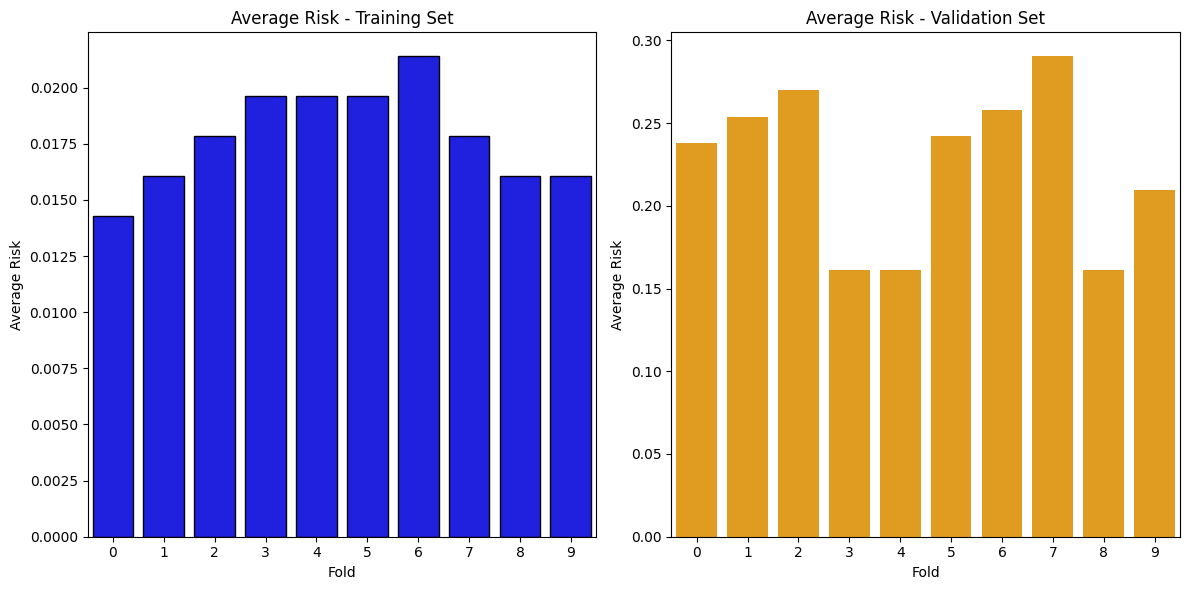

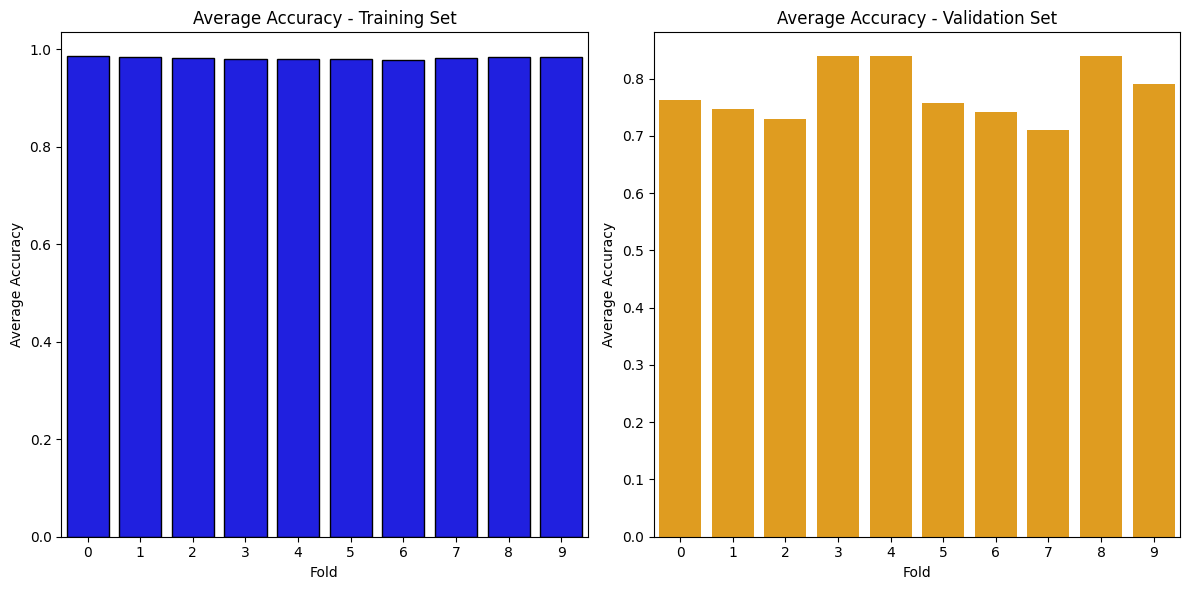

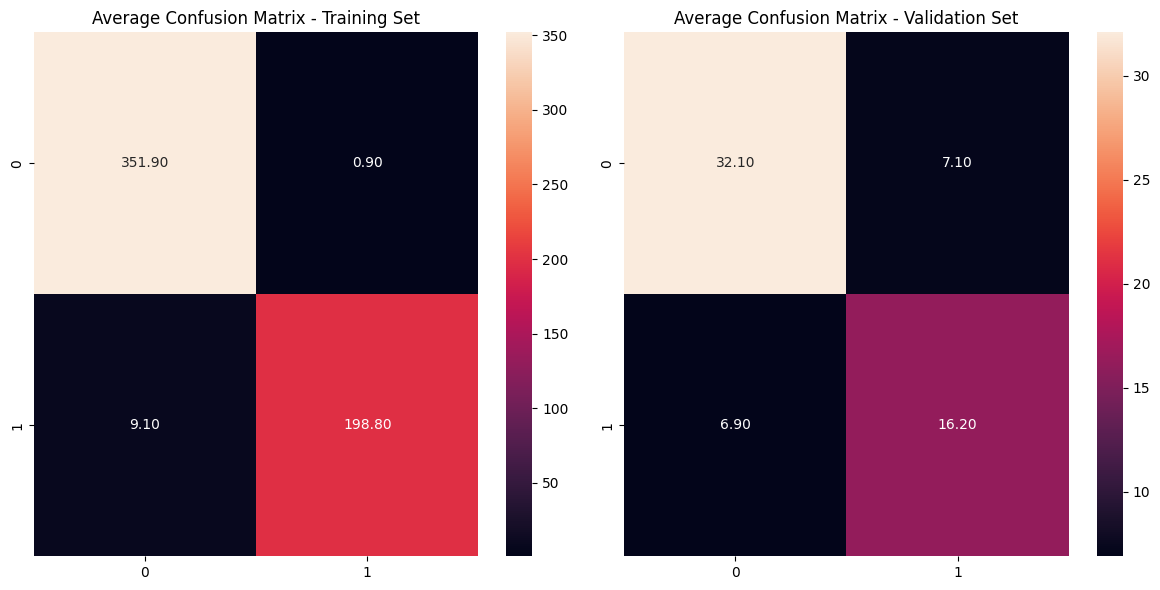

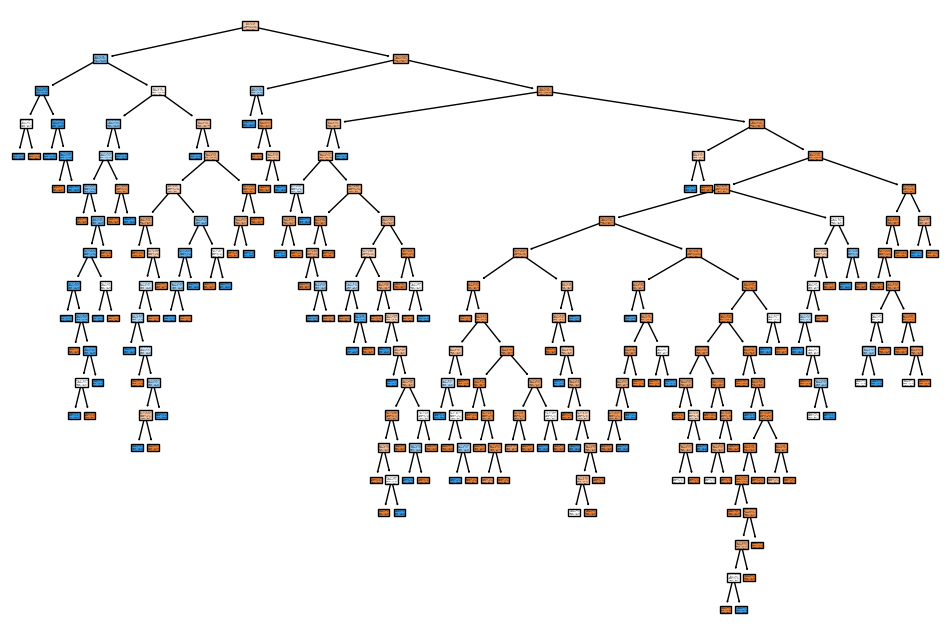

In [387]:
#Validation croisee avec critere de gini

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

K = 2  # Assurez-vous de changer la valeur en fonction du nombre de classes

stock_average_risk_Train = np.zeros((nbFolds, 1))
stock_average_risk_Val = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train = np.zeros((nbFolds, K))
stock_RiskPerClass_Val = np.zeros((nbFolds, K))

stock_Accuracy_Train = np.zeros(nbFolds)
stock_Accuracy_Val = np.zeros(nbFolds)

stock_ConfMat_Train = np.zeros((nbFolds, K, K))
stock_ConfMat_Val = np.zeros((nbFolds, K, K))

f = 0

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    # Création et entraînement du modèle d'arbre de décision avec critère de Gini
    DT_model = DecisionTreeClassifier(random_state=0, criterion='gini')
    DT_model.fit(XTrain, YRTrain)

    # Prediction on the training samples
    YhatTrain_DT = DT_model.predict(XTrain)
    stock_average_risk_Train[f, 0] = 1 - accuracy_score(YRTrain, YhatTrain_DT)
    stock_RiskPerClass_Train[f, :] = 1 - np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_DT[YRTrain == 0]),
                                                  accuracy_score(YRTrain[YRTrain == 1], YhatTrain_DT[YRTrain == 1])])
    stock_Accuracy_Train[f] = accuracy_score(YRTrain, YhatTrain_DT)
    stock_ConfMat_Train[f, :, :] = confusion_matrix(YRTrain, YhatTrain_DT)

    # Prediction on the testing samples
    YhatVal_DT = DT_model.predict(XVal)
    stock_average_risk_Val[f, 0] = 1 - accuracy_score(YRVal, YhatVal_DT)
    stock_RiskPerClass_Val[f, :] = 1 - np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_DT[YRVal == 0]),
                                                 accuracy_score(YRVal[YRVal == 1], YhatVal_DT[YRVal == 1])])
    stock_Accuracy_Val[f] = accuracy_score(YRVal, YhatVal_DT)
    stock_ConfMat_Val[f, :, :] = confusion_matrix(YRVal, YhatVal_DT)

    f = f + 1

#  plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()

# Affichage de l'arbre de décision final
plt.figure(figsize=(12, 8))
plot_tree(DT_model, filled=True, class_names=['Mort', 'Vivant'])
plt.show()


## Random Forest

Dans le cadre de notre projet, nous avons choisi d'explorer les capacités du classifieur Random Forest, une technique puissante et polyvalente en apprentissage automatique. Le Random Forest, ou "forêt aléatoire" en français, tire son efficacité de la combinaison de multiples arbres de décision, chacun entraîné sur des sous-ensembles aléatoires de notre ensemble de données.

Le fonctionnement du Random Forest repose sur deux principaux concepts : l'agrégation (ou "bagging") et la sélection aléatoire de caractéristiques. Tout d'abord, plusieurs arbres de décision sont construits, chacun sur un échantillon aléatoire de notre ensemble de données. Ensuite, ces arbres individuels votent pour la classe d'appartenance d'une observation donnée. La classe finale attribuée est celle qui reçoit le plus grand nombre de votes parmi l'ensemble des arbres.

L'utilisation de multiples arbres de décision et de l'échantillonnage aléatoire contribuent à réduire le surajustement (overfitting) inhérent à un arbre de décision unique. Cela rend le Random Forest plus robuste et généralement moins sensible aux fluctuations aléatoires dans les données.

Un autre aspect clé du Random Forest est sa capacité à mesurer l'importance relative des différentes caractéristiques dans la prise de décision. Cette information peut être cruciale pour identifier les caractéristiques les plus informatives dans notre ensemble de données.

Nous allons maintenant appliquer le classifieur Random Forest à notre base de données. Une fois entraîné, nous évaluerons ses performances, examinerons son arborescence de décision pour comprendre ses processus internes, et utiliserons des techniques de visualisation telles que le t-SNE pour représenter graphiquement les résultats.


Accuracy du modèle Random Forest: 0.14


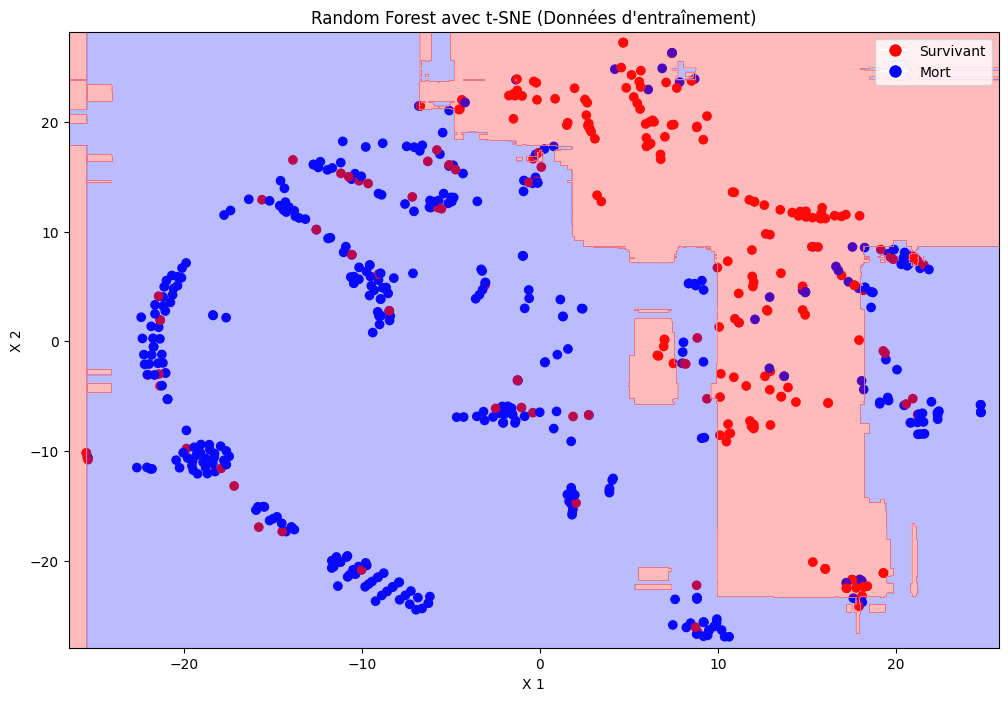

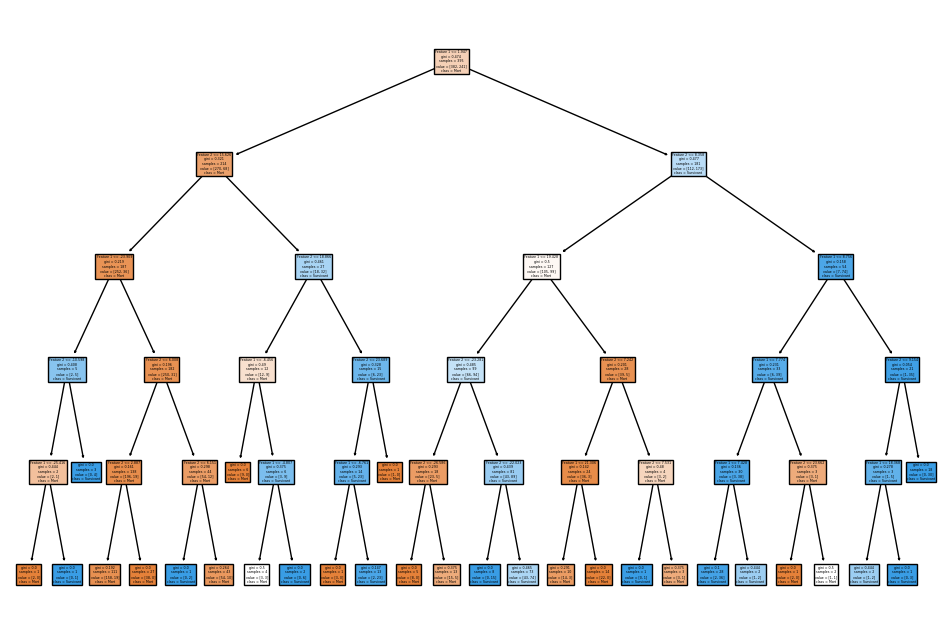

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Entraîner le modèle Random Forest avec des conditions d'arrêt spécifiées
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=0)
model_rf.fit(X_train, y_train)

# Prédictions sur les données de test
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)

print(f'Accuracy du modèle Random Forest: {accuracy_rf:.2f}')

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne_rf = tsne.fit_transform(X_train)  # Utilisez les données d'entraînement pour t-SNE

# Entraîner le modèle Random Forest sur les données transformées par t-SNE
model_rf.fit(X_tsne_rf, y_train)

# Tracer les points de données
plt.figure(figsize=(12, 8))
# Tracer les points de données
plt.scatter(X_tsne_rf[:, 0], X_tsne_rf[:, 1], c=y_train, cmap='bwr', marker='o', label='Données d\'entraînement')

# Tracer la frontière de décision avec des couleurs de fond
h = .02  # Pas de la grille
x_min, x_max = X_tsne_rf[:, 0].min() - 1, X_tsne_rf[:, 0].max() + 1
y_min, y_max = X_tsne_rf[:, 1].min() - 1, X_tsne_rf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Créer une légende personnalisée
classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Random Forest avec t-SNE (Données d\'entraînement)')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()

# Affichage d'un arbre de la forêt (ici le premier arbre, vous pouvez changer l'indice si nécessaire)
plt.figure(figsize=(12, 8))
tree = model_rf.estimators_[0]
plot_tree(tree, filled=True, class_names=['Mort', 'Survivant'], feature_names=['Feature 1', 'Feature 2'])
plt.show()


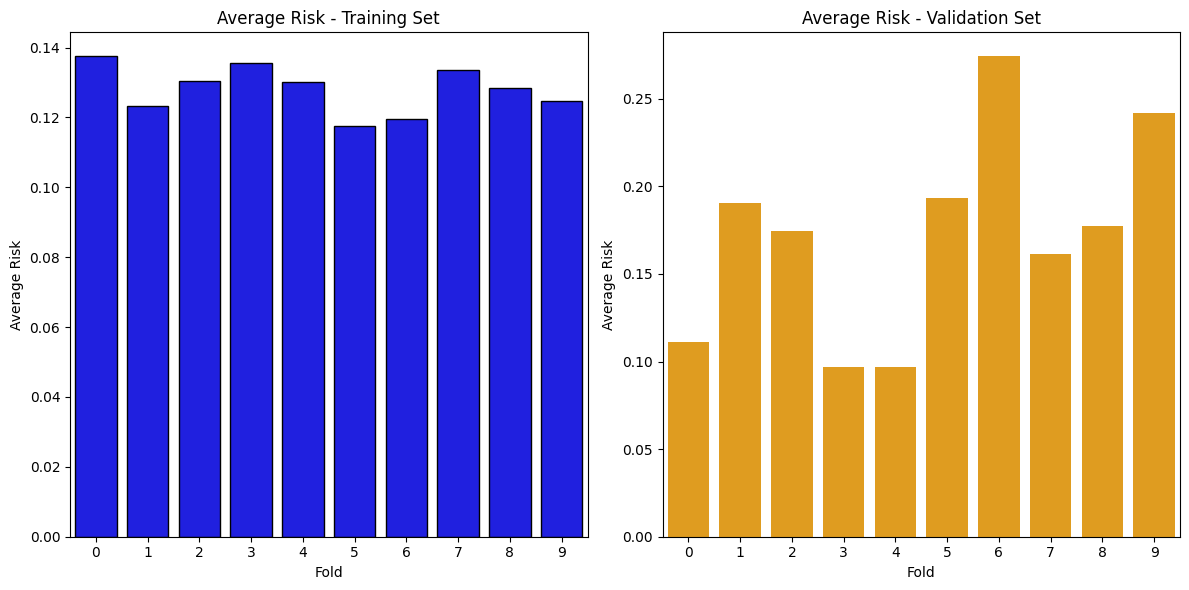

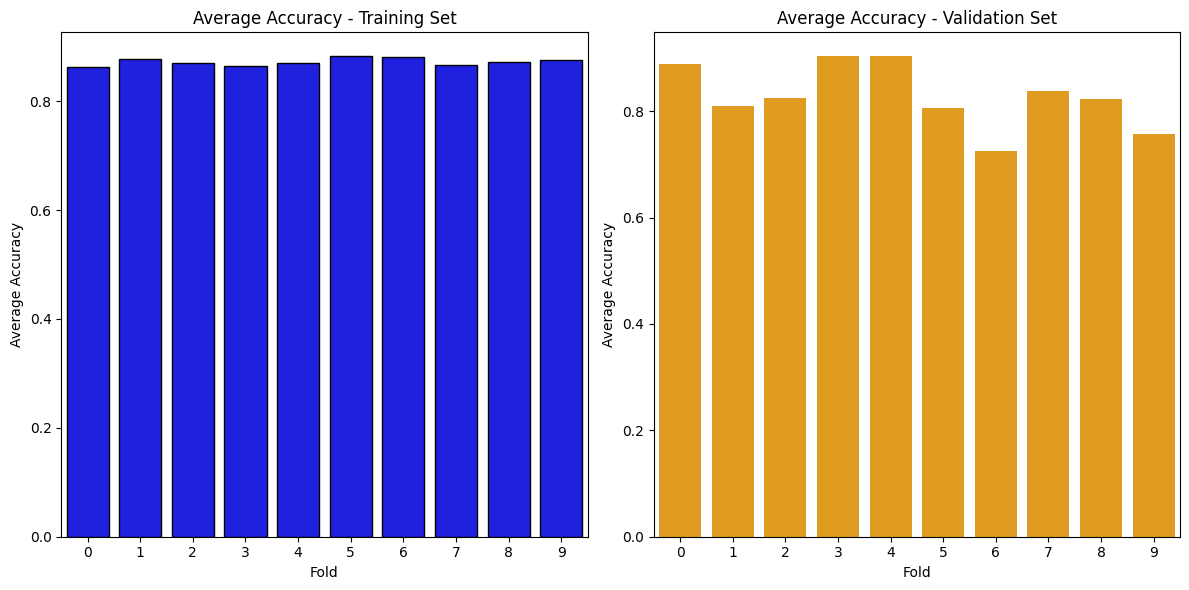

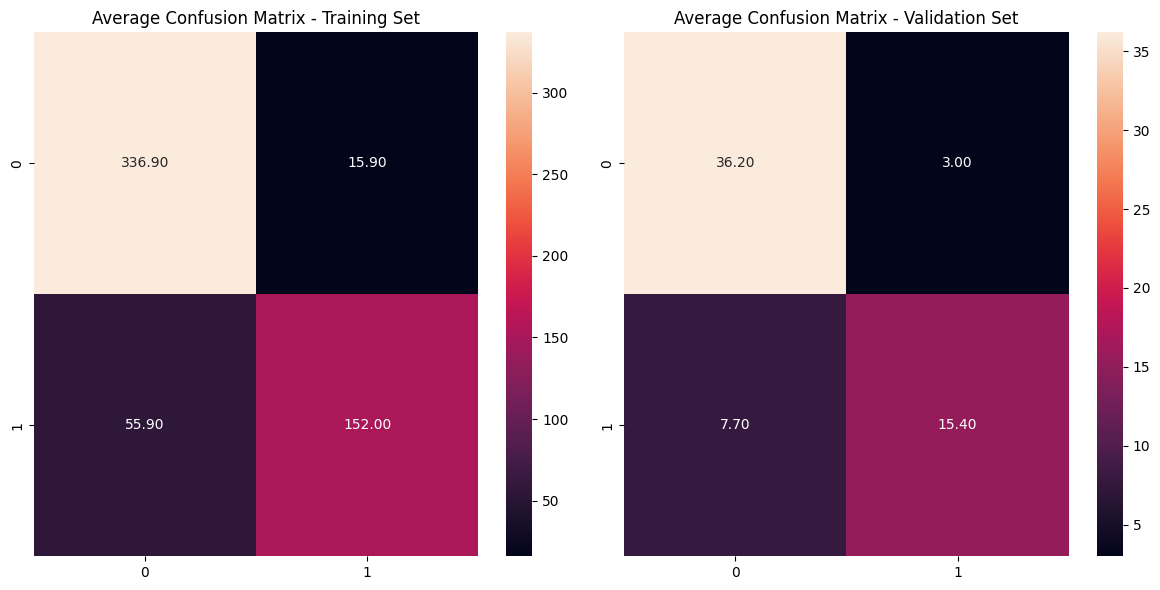

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(407)

# Définir le nombre de classes (K) - assurez-vous de changer cela en fonction de votre configuration
K = 2

# Définir le nombre de folds
nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

# Initialiser des tableaux pour stocker les résultats de chaque fold
stock_average_risk_Train_rf = np.zeros((nbFolds, 1))
stock_average_risk_Val_rf = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_rf = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_rf = np.zeros((nbFolds, K))

stock_Accuracy_Train_rf = np.zeros(nbFolds)
stock_Accuracy_Val_rf = np.zeros(nbFolds)

stock_AccPerClass_Train_rf = np.zeros((nbFolds, K))
stock_AccPerClass_Val_rf = np.zeros((nbFolds, K))

stock_ConfMat_Train_rf = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_rf = np.zeros((nbFolds, K, K))

f = 0

# Boucle sur les folds
for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    # Entraîner le modèle Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=0)
    model_rf.fit(XTrain, YRTrain)

    # Prédiction sur les données d'entraînement
    YhatTrain_rf = model_rf.predict(XTrain)
    stock_average_risk_Train_rf[f, 0] = 1 - accuracy_score(YRTrain, YhatTrain_rf)
    stock_RiskPerClass_Train_rf[f, :] = 1 - np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_rf[YRTrain == 0]),
                                                     accuracy_score(YRTrain[YRTrain == 1], YhatTrain_rf[YRTrain == 1])])
    stock_Accuracy_Train_rf[f] = accuracy_score(YRTrain, YhatTrain_rf)
    stock_AccPerClass_Train_rf[f, :] = np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_rf[YRTrain == 0]),
                                                 accuracy_score(YRTrain[YRTrain == 1], YhatTrain_rf[YRTrain == 1])])
    stock_ConfMat_Train_rf[f, :, :] = confusion_matrix(YRTrain, YhatTrain_rf)

    # Prédiction sur les données de validation
    YhatVal_rf = model_rf.predict(XVal)
    stock_average_risk_Val_rf[f, 0] = 1 - accuracy_score(YRVal, YhatVal_rf)
    stock_RiskPerClass_Val_rf[f, :] = 1 - np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_rf[YRVal == 0]),
                                                   accuracy_score(YRVal[YRVal == 1], YhatVal_rf[YRVal == 1])])
    stock_Accuracy_Val_rf[f] = accuracy_score(YRVal, YhatVal_rf)
    stock_AccPerClass_Val_rf[f, :] = np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_rf[YRVal == 0]),
                                               accuracy_score(YRVal[YRVal == 1], YhatVal_rf[YRVal == 1])])
    stock_ConfMat_Val_rf[f, :, :] = confusion_matrix(YRVal, YhatVal_rf)

    f = f + 1

# Tracer les résultats

# plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train_rf.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val_rf.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_rf, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_rf, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train_rf, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val_rf, axis=0), annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()


## Classifieur Non Supervisé - K-Means

<!-- Nous applique nos conaissence qui a été developé pendant le semestre et utiliser un classifieur non superviosne meme si nous savons le label e combien de classe... -->

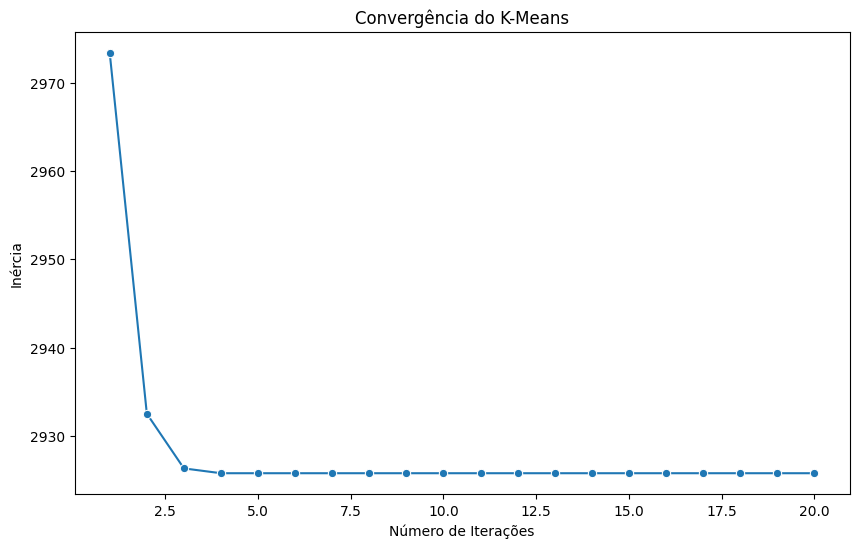

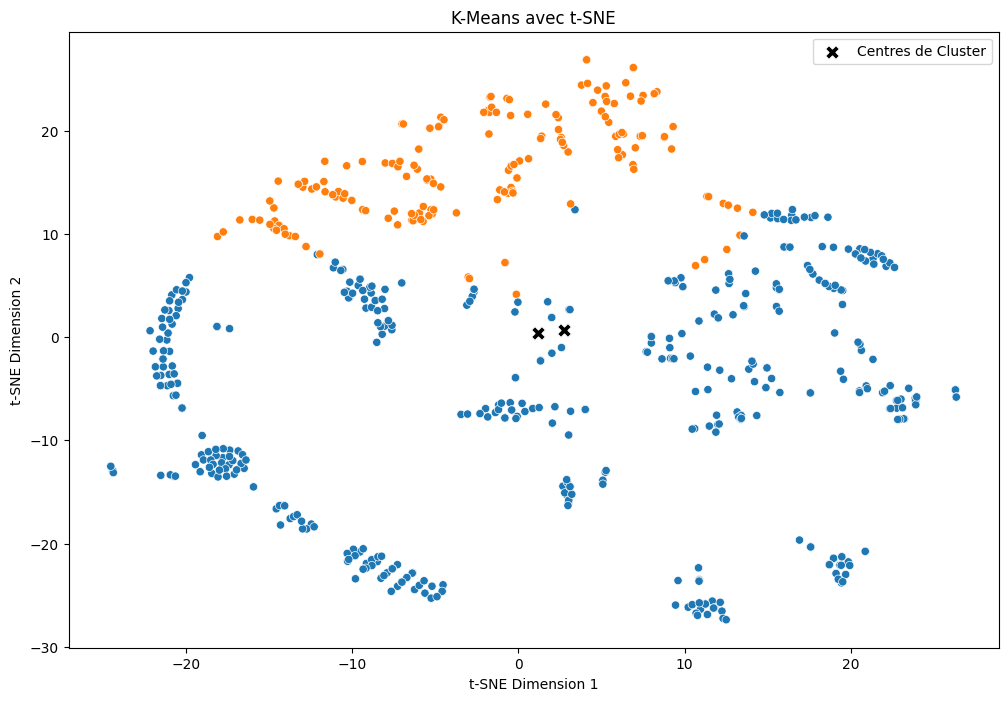

In [25]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Configurar o K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)

# Inicializar uma lista para armazenar as inércias em cada iteração
inertias = []

# Treinar o K-Means e registrar a inércia em cada iteração
for i in range(1, 21):
    kmeans.set_params(n_init=1, max_iter=i)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico de convergência usando Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=inertias, marker='o')
plt.title('Convergência do K-Means')
plt.xlabel('Número de Iterações')
plt.ylabel('Inércia')
plt.show()

# Prédire les clusters avec le modèle K-Means sur les données transformées par t-SNE
predictions_kmeans = kmeans.predict(X_train)

# Tracer les points de données avec seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_kmeans, palette='tab10', marker='o', legend=False)

# Tracer les centres de cluster
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centres de Cluster')

plt.title('K-Means avec t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


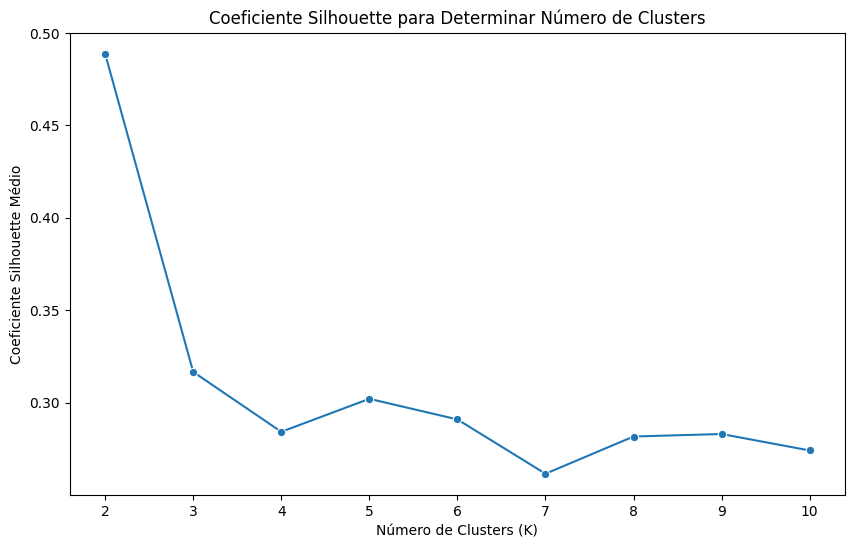

Número ideal de clusters (K) com Silhouette: 2


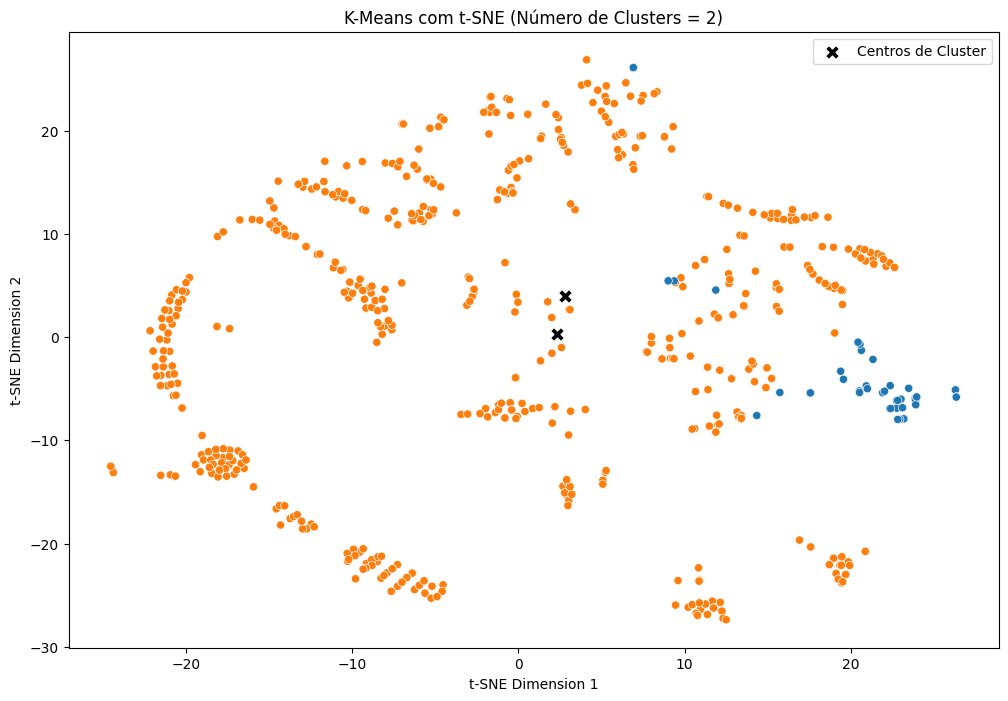

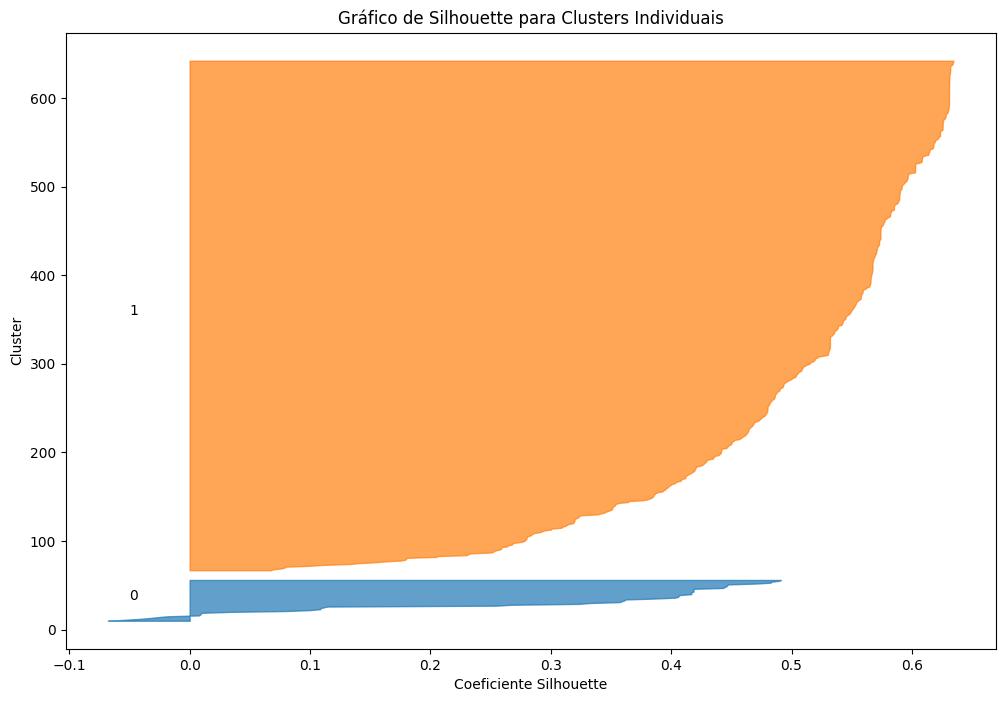

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Encontrar o número ideal de clusters usando o coeficiente Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    predictions = kmeans.predict(X_train)
    silhouette_avg = silhouette_score(X_train, predictions)
    silhouette_scores.append(silhouette_avg)

# Plotar o gráfico de Silhouette para determinar o número ideal de clusters
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('Coeficiente Silhouette para Determinar Número de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente Silhouette Médio')
plt.show()

# Escolher o número de clusters com o maior coeficiente Silhouette
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 porque começamos com k=2
print(f'Número ideal de clusters (K) com Silhouette: {optimal_k}')

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Configurar o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, random_state=42)
kmeans.fit(X_train)

# Prédire os clusters
predictions_kmeans = kmeans.predict(X_train)

# Plotar os pontos de dados com seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_kmeans, palette='tab10', marker='o', legend=False)

# Plotar os centros de cluster
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centros de Cluster')

plt.title('K-Means com t-SNE (Número de Clusters = {})'.format(optimal_k))
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()





# Configurar o K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, random_state=42)
kmeans.fit(X_train)

# Prédire os clusters
predictions_kmeans = kmeans.predict(X_train)

# Calcular o coeficiente Silhouette para cada observação
silhouette_values = silhouette_samples(X_train, predictions_kmeans)

# Plotar o gráfico de Silhouette para cada observação
plt.figure(figsize=(12, 8))
y_lower = 10
for i in range(optimal_k):
    # Agregar os valores Silhouette para clusters individuais
    cluster_silhouette_values = silhouette_values[predictions_kmeans == i]
    cluster_silhouette_values.sort()
    
    # Calcular o y_upper para cada cluster
    y_upper = y_lower + len(cluster_silhouette_values)
    
    # Cor para cada cluster
    color = sns.color_palette('tab10')[i]
    
    # Preencher a área entre y_lower e y_upper com a cor do cluster
    plt.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=cluster_silhouette_values, color=color, alpha=0.7)
    
    # Etiquetas para indicar o valor médio de Silhouette em cada cluster
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))
    
    # Atualizar y_lower para o próximo cluster
    y_lower = y_upper + 10  # 10 para a lacuna entre os clusters

plt.title('Gráfico de Silhouette para Clusters Individuais')
plt.xlabel('Coeficiente Silhouette')
plt.ylabel('Cluster')
plt.show()
